# Proyecto para poder predecir el volumen de pasajeros por aerolinea

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pycaret as pc


### Para poder trabajar con los datasets, lo primero es insertar una nueva columna con su respectivo año

In [3]:
# # Insertar la columna de año en cada archivo CSV
# años = range(1992, 2024)

# for año in años:
#     # Lee el archivo CSV
#     df = pd.read_csv(f"{año}.csv")

#     # Agrega la columna de año
#     df['Año'] = año

#     # Mueve la columna de año al principio
#     col_año = df.pop('Año')
#     df.insert(0, 'Año', col_año)

#     # Guarda el DataFrame modificado de nuevo en el archivo CSV
#     df.to_csv(f"{año}.csv", index=False)




In [4]:
# enlista todos los archivos CSV
años = range(1992, 2024)
dataframes = []

for año in años:
    df = pd.read_csv(f"{año}.csv")
    dataframes.append(df)

In [5]:
df_2000 = dataframes[8]
df_2000.head()

,Año,E m p r e s a / Air Carrier,1,2,3,4,5,6,7,8,9,10,11,12,Total / Total
0,2000,Aeroméxico (Aerovías de México),569834,564413,629393,573657,613314,582518,674770,675337,577813,611237,619420,599263,7290969
1,2000,Mexicana (Mexicana de Aviación),417899,409033,463927,414059,461341,444833,504703,484081,397785,431677,446832,431445,5307615
2,2000,Aerocalifornia,135320,117694,129823,119110,120550,105661,121408,121556,94144,104904,116253,131247,1417670
3,2000,Aviacsa (Consorcio Aviaxsa),93523,85159,99417,104974,121242,108582,141440,143899,111769,118499,120857,134192,1383553
4,2000,Aerolitoral (Servicios Aéreos Litoral S.A de ...,55678,53515,59177,54849,62174,59692,59642,69458,61772,67673,65337,63206,732173


In [5]:
df_old=pd.read_csv('old/2000.csv')

In [6]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Año                          12 non-null     int64 
 1   E m p r e s a / Air Carrier  12 non-null     object
 2   1                            12 non-null     int64 
 3   2                            12 non-null     int64 
 4   3                            12 non-null     int64 
 5   4                            12 non-null     int64 
 6   5                            12 non-null     int64 
 7   6                            12 non-null     int64 
 8   7                            12 non-null     int64 
 9   8                            12 non-null     int64 
 10  9                            12 non-null     int64 
 11  10                           12 non-null     int64 
 12  11                           12 non-null     int64 
 13  12                           12 non-n

### El primer problema de los ds es que los numeros de pasajeros de cada mes estaban como tipo objecto, por lo que pase todos los numeros a int de cada ds ademas que si marcaba un NaN lo replazaba a 0

In [7]:
# def convertir_columnas_a_int(df, columnas):
#     for col in columnas:
#         # Remover las comas y convertir a numérico, reemplazar NaN con 0, y convertir a entero
#         df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
#     return df

In [8]:
# # Lista de columnas a convertir, excluyendo 'Año' y 'E m p r e s a / Air Carrier'
# columnas_a_convertir = ['Ene/Jan', 'Feb/Feb', 'Mar/Mar', 'Abr/Apr', 'May/May', 'Jun/Jun', 
#                         'Jul/Jul', 'Ago/Aug', 'Sep/Sep', 'Oct/Oct', 'Nov/Nov', 'Dic/Dec', 'Total / Total']

# # Asumiendo que tienes una lista de años correspondiente a tus archivos CSV
# años = range(1992, 2024)  # Ajusta el rango de años según tus archivos

# # Aplicar la conversión y guardar los cambios
# for año in años:
#     # Cargar el DataFrame
#     df = pd.read_csv(f"{año}.csv")

#     # Convertir las columnas a enteros
#     df = convertir_columnas_a_int(df, columnas_a_convertir)

#     # Guardar el DataFrame modificado de vuelta a un archivo CSV
#     df.to_csv(f"modificado_{año}.csv", index=False)

### Genere nuevos ds y los "Viejos" los pase a otra carpeta

In [9]:
# # Ahora que tenemos los archivos CSV modificados, podemos cargarlos todos en un solo DataFrame
# años = range(1992, 2024)
# dataframes = []  # La lista se debe llamar dataframes, no new_df, para coincidir con el uso en el bucle

# for año in años:
#     # Asegúrate de que el nombre del archivo corresponde al que has guardado
#     df = pd.read_csv(f"modificado_{año}.csv")

#     # Agrega la columna de año al final (aunque ya la tienes así que esta línea puede ser redundante)
#     df['Año'] = año

#     # Mueve la columna de año al principio
#     col_año = df.pop('Año')
#     df.insert(0, 'Año', col_año)

#     dataframes.append(df)



In [10]:
df_2000 = dataframes[13]
df_2000

,Año,E m p r e s a / Air Carrier,1,2,3,4,5,6,7,8,9,10,11,12,Total / Total
0,2005,ABC Aerolineas,0,0,0,0,0,0,0,0,0,0,0,38815,38815
1,2005,Aerocalifornia,152095,134880,155956,154014,156230,157572,189676,176352,137125,128423,113782,108018,1764123
2,2005,Aerolitoral (Servicios Aéreos Litoral S.A de ...,74904,72773,79600,80197,81074,78196,78774,75076,68599,68668,69033,65811,892705
3,2005,Aeromar,37799,39197,40778,46573,50177,49907,50949,50565,48798,52467,55717,50592,573519
4,2005,Aerovías Caribe S.A de C.V,53129,53141,61854,65561,68011,68456,90562,82667,78061,86674,95634,115950,919700
5,2005,Aeroméxico (Aerovías de México),519538,506647,546644,526608,546077,544255,590813,577708,485571,523274,532094,525484,6424713
6,2005,Aviacsa (Consorcio Aviaxsa),221625,226672,299896,277207,285714,264373,304563,250369,214869,237100,250359,287685,3120432
7,2005,Avolar,0,0,0,0,0,0,0,0,1478,5185,6573,9134,22370
8,2005,Grupo Aereo Monterrey,39715,28277,50223,42135,52629,59089,75207,56807,39849,35860,32436,36811,549038
9,2005,Lineas Aereas Azteca,65117,48785,65589,62323,83064,83331,108962,101223,82841,74389,69585,90790,935999


In [11]:
# # Mover los csv que no necesitamos a una carpeta llamada 'old'
# import os
# import shutil

# # Directorio donde están los archivos CSV que deseas mover
# source_directory = r'C:\Users\diego\Workspace\python\jupyter\ProyectA\Historico'

# # Directorio donde quieres mover los archivos CSV
# destination_directory = r'C:\Users\diego\Workspace\python\jupyter\ProyectA\Historico\old'

# # Año inicial y final de los archivos CSV
# start_year = 1992
# end_year = 2023

# # Bucle para mover cada archivo CSV del año especificado
# for year in range(start_year, end_year + 1):
#     file_name = f"{year}.csv"
#     source_file = os.path.join(source_directory, file_name)
#     destination_file = os.path.join(destination_directory, file_name)

#     if os.path.exists(source_file):
#         shutil.move(source_file, destination_file)  # Mover el archivo

# # Mensaje de confirmación
# "Archivos CSV desde 1992 hasta 2023 han sido movidos con éxito."


### Los nuevos archivos los renombre para que sea mas practico su manejo

In [12]:
# # Cambiar el nombre de varios archivos
# import os
# # Updated list of CSV files to rename, ranging from 1992 to 2023
# csv_files_to_rename = [f"modificado_{year}.csv" for year in range(1992, 2024)]

# for file in csv_files_to_rename:
#     if os.path.exists(file):
#         os.rename(file, file.replace('modificado_', ''))
#         print(f"{file} has been renamed.")
#     else:
#         print(f"{file} does not exist.")

In [13]:
# Ahora que tenemos los archivos CSV modificados, podemos cargarlos todos en un solo DataFrame
años = range(1992, 2024)
dataframes = []  # La lista se debe llamar dataframes, no new_df, para coincidir con el uso en el bucle

for año in años:
    # Asegúrate de que el nombre del archivo corresponde al que has guardado
    df = pd.read_csv(f"{año}.csv")
    
    dataframes.append(df)

In [14]:
df_2000 = dataframes[8]
df_2000.head()

,Año,E m p r e s a / Air Carrier,1,2,3,4,5,6,7,8,9,10,11,12,Total / Total
0,2000,Aeroméxico (Aerovías de México),569834,564413,629393,573657,613314,582518,674770,675337,577813,611237,619420,599263,7290969
1,2000,Mexicana (Mexicana de Aviación),417899,409033,463927,414059,461341,444833,504703,484081,397785,431677,446832,431445,5307615
2,2000,Aerocalifornia,135320,117694,129823,119110,120550,105661,121408,121556,94144,104904,116253,131247,1417670
3,2000,Aviacsa (Consorcio Aviaxsa),93523,85159,99417,104974,121242,108582,141440,143899,111769,118499,120857,134192,1383553
4,2000,Aerolitoral (Servicios Aéreos Litoral S.A de ...,55678,53515,59177,54849,62174,59692,59642,69458,61772,67673,65337,63206,732173


### Para que sea mas practico para el modelo pase los nombres de las columnas de los meses a tipo numerico ejemplo, "Enero" : 1 asi hasta Diciembre de cada ds

In [15]:
# # Pasar las columnas de meses a numeros
# import os

# month_mapping = {'Ene/Jan': 1,'Feb/Feb': 2,'Mar/Mar': 3,'Abr/Apr': 4,'May/May': 5,'Jun/Jun': 6,'Jul/Jul': 7,'Ago/Aug': 8,'Sep/Sep': 9,'Oct/Oct': 10,'Nov/Nov': 11,'Dic/Dec': 12}

# # Directory where the CSV files are located (you need to update this path to your directory)
# directory_path = r'C:\Users\diego\Workspace\python\jupyter\ProyectA\Historico'

# # Years for which the CSV files are named
# years = range(1992, 2024)

# # Iterate over each year, load the corresponding CSV file, rename the columns, and save the file
# for year in years:
#     file_path = os.path.join(directory_path, f"{year}.csv")
#     if os.path.exists(file_path):
#         # Load the dataset
#         df = pd.read_csv(file_path)

#         # Rename the columns
#         df.rename(columns=month_mapping, inplace=True)

#         # Save the updated dataframe back to CSV
#         df.to_csv(file_path, index=False)
#     else:
#         print(f"File for year {year} not found.")



# Melt

In [16]:
# Definir las columnas que no se van a fundir (id_vars) y las que se van a fundir (value_vars)
id_vars = ['Año', 'E m p r e s a / Air Carrier']
value_vars = [str(i) for i in range(1, 13)]

# Realizar la operación de fundido (melt)
melted_data = df_2000.melt(id_vars=id_vars, value_vars=value_vars, var_name='Mes', value_name='Pasajeros')

# Cambiar el nombre de la columna 'E m p r e s a / Air Carrier'
melted_data.rename(columns={'E m p r e s a / Air Carrier': 'Empresa / Air Carrier'}, inplace=True)

# Reordenar las columnas
melted_data = melted_data[['Año', 'Empresa / Air Carrier', 'Mes', 'Pasajeros']]

# Ordenar los datos por 'Empresa / Air Carrier' y luego por 'Mes'
melted_data.sort_values(by=['Empresa / Air Carrier', 'Mes'], inplace=True)

# Restablecer el índice del DataFrame
melted_data.reset_index(drop=True, inplace=True)

# Convertir la columna 'Mes' a entero para ordenar correctamente
melted_data['Mes'] = melted_data['Mes'].astype(int)

# Reordenar los datos por 'Empresa / Air Carrier' y 'Mes' en orden ascendente
melted_data.sort_values(by=['Empresa / Air Carrier', 'Mes'], inplace=True)



In [17]:
melted_data.head()

,Año,Empresa / Air Carrier,Mes,Pasajeros
0,2000,Aero Cuahonte S.A de C.V,1,2986
4,2000,Aero Cuahonte S.A de C.V,2,2733
5,2000,Aero Cuahonte S.A de C.V,3,3216
6,2000,Aero Cuahonte S.A de C.V,4,3072
7,2000,Aero Cuahonte S.A de C.V,5,3199


### Una vez que probe en un ds el metodo de melt para poder acomodar los datos, voy a unir todos los ds en uno solo para posteriormente aplicar nuevamente el metodo

In [18]:
# Unir todos los dataframes en uno solo
df = pd.concat(dataframes)

In [19]:
df

,Año,E m p r e s a / Air Carrier,1,2,3,4,5,6,7,8,9,10,11,12,Total / Total
0,1992,Aeroméxico (Aerovías de México),427833,428738,444647,451556,478995,447570,556623,618712,443534,482156,481395,489795,5751554
1,1992,Mexicana (Mexicana de Aviación),430610,391249,425599,469492,451100,422408,536393,581968,361733,422123,426534,439437,5358646
2,1992,"Transportes Aéreos Ejecutivos, S.A. (T.A.E.S.A)",29417,22540,33264,38883,39115,36307,69080,88622,34131,96398,102953,128931,719641
3,1992,Aerocalifornia,46706,43378,63142,47588,52314,53849,57709,73256,53844,64305,67982,74630,698703
4,1992,Aviacsa (Consorcio Aviaxsa),21274,21556,25940,28548,25922,25439,27975,30282,26112,32796,30981,44530,341355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023,Magnicharters (Grupo Aéreo Monterrey),15438,11992,15589,22224,22311,26027,38495,33617,20794,27175,0,0,233662
5,2023,Transportes Aéreos Regionales (TAR),23680,19704,23229,23384,22530,16972,16965,17102,13440,15799,0,0,192805
6,2023,Aéreo Calafia,9895,9031,4538,7610,10045,8579,7815,711,136,745,0,0,59105
7,2023,Aeromar,22711,9220,0,0,0,0,0,0,0,0,0,0,31931


In [20]:
# Crear el csv del dataframe
df.to_csv('Historico.csv', index=False)

In [21]:
# Aplicar la funcion (melt) al dataframe
melted_history = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Mes', value_name='Pasajeros')

In [22]:
melted_history

,Año,E m p r e s a / Air Carrier,Mes,Pasajeros
0,1992,Aeroméxico (Aerovías de México),1,427833
1,1992,Mexicana (Mexicana de Aviación),1,430610
2,1992,"Transportes Aéreos Ejecutivos, S.A. (T.A.E.S.A)",1,29417
3,1992,Aerocalifornia,1,46706
4,1992,Aviacsa (Consorcio Aviaxsa),1,21274
...,...,...,...,...
4519,2023,Magnicharters (Grupo Aéreo Monterrey),12,0
4520,2023,Transportes Aéreos Regionales (TAR),12,0
4521,2023,Aéreo Calafia,12,0
4522,2023,Aeromar,12,0


In [23]:
# Cambiar el nombre de la columna 'E m p r e s a / Air Carrier'
melted_history.rename(columns={'E m p r e s a / Air Carrier': 'Aerolinea'}, inplace=True)

In [24]:
melted_history.head(10)

,Año,Aerolinea,Mes,Pasajeros
0,1992,Aeroméxico (Aerovías de México),1,427833
1,1992,Mexicana (Mexicana de Aviación),1,430610
2,1992,"Transportes Aéreos Ejecutivos, S.A. (T.A.E.S.A)",1,29417
3,1992,Aerocalifornia,1,46706
4,1992,Aviacsa (Consorcio Aviaxsa),1,21274
5,1992,Servicios Aereos Rutas Oriente (S.A.R.O),1,18166
6,1992,Aerovías Caribe S.A de C.V,1,18049
7,1992,Aeromar,1,13189
8,1992,Aviación del Noroeste S.A de C.V,1,15343
9,1992,Aerocozumel,1,14011


In [25]:
# Guardar el dataframe en un csv
# melted_history.to_csv('Historico_melted.csv', index=False)

In [26]:
pd.read_csv('Historico_melted.csv')

,Año,Aerolinea,Mes,Pasajeros
0,1992,Aeroméxico (Aerovías de México),1,427833
1,1992,Mexicana (Mexicana de Aviación),1,430610
2,1992,"Transportes Aéreos Ejecutivos, S.A. (T.A.E.S.A)",1,29417
3,1992,Aerocalifornia,1,46706
4,1992,Aviacsa (Consorcio Aviaxsa),1,21274
...,...,...,...,...
4519,2023,Magnicharters (Grupo Aéreo Monterrey),12,0
4520,2023,Transportes Aéreos Regionales (TAR),12,0
4521,2023,Aéreo Calafia,12,0
4522,2023,Aeromar,12,0


In [27]:
Historico_melted = pd.read_csv('Historico_melted_update.csv')

In [28]:
#Quitar las comas, comillas y puntos de la columna Aerolinea
#Historico_melted['Aerolinea'] = Historico_melted['Aerolinea'].str.replace(',', '')
#Historico_melted['Aerolinea'] = Historico_melted['Aerolinea'].str.replace('.', '')
#Historico_melted['Aerolinea'] = Historico_melted['Aerolinea'].str.replace('"', '')

In [29]:
#Historico_melted.head(10)

In [30]:
#Guardar el dataframe en un csv
#Historico_melted.to_csv('Historico_melted_update.csv', index=False)

In [31]:
#Creamos un diccionario para cambiar el nombre de las aerolineas
aerolineas_dict = {'ABC Aerolineas': 'Interjet','ABC Aerolíneas': 'Interjet', 'Interjet (ABC Aerolíneas)': 'Interjet', 'Aéreo Calafia':	'Aéreo Calafia', 'Aerocalifornia': 'Aerocalifornia', 'Aeroenlaces': 'Vivaaerobus', 'Aerolineas Mesoamericanas': 'Aerolineas Mesoamericanas', 'Aerolitoral (Servicios Aéreos Litoral  S.A de C.V)': 'Aeroméxico Connect', 'Aeromar': 'Aeromar', 'Aeroméxico (Aerovias de México)': 'Aeroméxico', 'Aeroméxico (Aerovías de México)': 'Aeroméxico', 'Aeroméxico (Aerovías de México)': 'Aeroméxico', 'Aeroméxico Connect': 'Aeroméxico', 'Aeroméxico Travel': 'Aeroméxico', 'Aeroméxico Connect (Aerolitoral)': 'Aeroméxico Connect', 'Aeroméxico Travel': 'Aeroméxico Travel', 'Aerovías Caribe S.A  de C.V': 'Click Mexicana', 'Alma (Aerolineas Mesoamericanas)': 'Alma', 'Aviacsa (Consorcio Aviaxsa)': 'Aviacsa', 'Avolar': 'Avolar', 'Click (Aerovías Caribe)': 'Mexicana', 'Grupo  Aereo Monterrey': 'Magnicharters', 'Grupo Aereo  Monterrey': 'Magnicharters', 'Lineas Aereas Azteca': 'Lineas Aereas Azteca', 'Magnicharters (Grupo Aéreo Monterrey)':	'Magnicharters', 'Aeromonterrey': 'Magnicharters' , 'Mexicana (Mexicana de Aviación)':	'Mexicana', 'Mexicana Link': 'Mexicana', 'Click Mexicana': 'Mexicana', 'Mexicana Link': 'Mexicana', 'Transportes Aéreos Regionales (TAR)': 'TAR', 'Vivaaerobus (Aeroenlaces)': 'Vivaaerobus', 'Volaris (Concesionaria Vuela Cia de Aviación)': 'Volaris', 'Vuela': 'Volaris', 'Transportes Aéreos Ejecutivos SA (TAESA)': 'Transportes Aéreos Ejecutivos SA (TAESA)', 'Aeroméxico Travel': 'Aeroméxico', 'Mexicana Link ': 'Mexicana'}


In [32]:
#Ver un elemento del diccionario
aerolineas_dict['Aeroméxico (Aerovías de México)']

'Aeroméxico'

In [33]:
#Cambiamos el nombre de las aerolineas y lo guardamos en un csv, de no estar en el diccionario se queda igual
Historico_melted['Aerolinea'] = Historico_melted['Aerolinea'].replace(aerolineas_dict)
Historico_melted.to_csv('Historico_melted_updated.csv', index=False)


In [34]:
#Obtener todos los nombres de las aerolineas
update = pd.read_csv('Historico_melted_updated.csv')
update['Aerolinea'].unique()

array(['Aeroméxico', 'Mexicana',
       'Transportes Aéreos Ejecutivos SA (TAESA)', 'Aerocalifornia',
       'Aviacsa', 'Servicios Aereos Rutas Oriente  (SARO)',
       'Aerovías Caribe SA  de CV', 'Aeromar',
       'Aviación del Noroeste SA de CV', 'Aerocozumel',
       'Aerolitoral (Servicios Aéreos Litoral  SA de CV) ',
       'Aerovías de Poniente SA de CV', 'Aero Sudpacifico SA',
       'Magnicharters', 'Aerolineas Morelos SA (Aeromorelos)',
       'Transportes Aéreos  Gane SA  de CV',
       'Servicio Aéreo Leo López SA de CV', 'Pal Aerolineas SA de CV',
       'Aeroejecutivo SA de CV ', 'Aerolineas Internacionales',
       'Lineas Aereas Allegro', 'Aero Cuahonte SA de CV',
       'Lineas Aereas Azteca', 'Interjet', 'Avolar', 'Vivaaerobus',
       'Aerolineas Mesoamericanas', 'Volaris', 'Aeroméxico Connect',
       'Alma', 'Aéreo Calafia', 'TAR', 'Aerus'], dtype=object)

In [35]:
# Organizar el csv por año
""" df = pd.read_csv('Historico_melted_updated.csv')

# Ordena el dataframe por Año, Aerolinea y Mes
sorted_df = df.sort_values(by=['Año', 'Aerolinea', 'Mes'])

# Guarda el dataframe ordenado en un nuevo archivo CSV (opcional)
sorted_file_path = 'Historico_sorted.csv'  # Reemplaza con la ruta deseada
sorted_df.to_csv(sorted_file_path, index=False) """

" df = pd.read_csv('Historico_melted_updated.csv')\n\n# Ordena el dataframe por Año, Aerolinea y Mes\nsorted_df = df.sort_values(by=['Año', 'Aerolinea', 'Mes'])\n\n# Guarda el dataframe ordenado en un nuevo archivo CSV (opcional)\nsorted_file_path = 'Historico_sorted.csv'  # Reemplaza con la ruta deseada\nsorted_df.to_csv(sorted_file_path, index=False) "

In [36]:
#sorted_df.head(10)

In [37]:
# Organizar el csv por año
#df = pd.read_csv('Historico_melted_updated.csv')

# Ordena el dataframe por Año, Aerolinea y Mes
#sorted_df = df.sort_values(by=['Año','Aerolinea'])

# Guarda el dataframe ordenado en un nuevo archivo CSV (opcional)
#sorted_file_path = 'Historico_sorted_aero.csv'  # Reemplaza con la ruta deseada
#sorted_df.to_csv(sorted_file_path, index=False)

In [38]:
""" # Arreglamos las discrepancias de los nombres de las aerolineas

airline_data = pd.read_csv('Historico_sorted.csv')	

# Agrupa los datos por 'Año', 'Aerolinea', y 'Mes' y suma los 'Pasajeros'
grouped_data = airline_data.groupby(['Año', 'Aerolinea', 'Mes']).agg({'Pasajeros': 'sum'}).reset_index()

# Muestra las primeras filas del dataframe agrupado para verificar los cambios
print(grouped_data.head())

# Para guardar el dataframe agrupado en un nuevo archivo CSV
grouped_data.to_csv('Historico_sorted.csv', index=False)  """


" # Arreglamos las discrepancias de los nombres de las aerolineas\n\nairline_data = pd.read_csv('Historico_sorted.csv')\t\n\n# Agrupa los datos por 'Año', 'Aerolinea', y 'Mes' y suma los 'Pasajeros'\ngrouped_data = airline_data.groupby(['Año', 'Aerolinea', 'Mes']).agg({'Pasajeros': 'sum'}).reset_index()\n\n# Muestra las primeras filas del dataframe agrupado para verificar los cambios\nprint(grouped_data.head())\n\n# Para guardar el dataframe agrupado en un nuevo archivo CSV\ngrouped_data.to_csv('Historico_sorted.csv', index=False)  "

## Diccionario de df

In [39]:
data = pd.read_csv('Historico_sorted.csv')
data.head()

,Año,Aerolinea,Mes,Pasajeros
0,1992,Aero Sudpacifico SA,1,1404
1,1992,Aero Sudpacifico SA,2,2128
2,1992,Aero Sudpacifico SA,3,2641
3,1992,Aero Sudpacifico SA,4,2653
4,1992,Aero Sudpacifico SA,5,2438


In [40]:
unique_airlines = data['Aerolinea'].unique()

airles_subsets = {}

for airline in unique_airlines:
    airles_subset = data[data['Aerolinea'] == airline]
    airles_subsets[airline] = airles_subset


In [41]:
aerocozumel_subset = airles_subsets['Aerocozumel']
aerocozumel_subset.head()

,Año,Aerolinea,Mes,Pasajeros
24,1992,Aerocozumel,1,14011
25,1992,Aerocozumel,2,9837
26,1992,Aerocozumel,3,12917
27,1992,Aerocozumel,4,14170
28,1992,Aerocozumel,5,12643


In [42]:
interjet_subset = airles_subsets['Interjet']
interjet_subset.head()

,Año,Aerolinea,Mes,Pasajeros
2376,2005,Interjet,1,0
2377,2005,Interjet,2,0
2378,2005,Interjet,3,0
2379,2005,Interjet,4,0
2380,2005,Interjet,5,0


## Visualizacion de las tendencias de las aerolineas en los ultimos 5 años

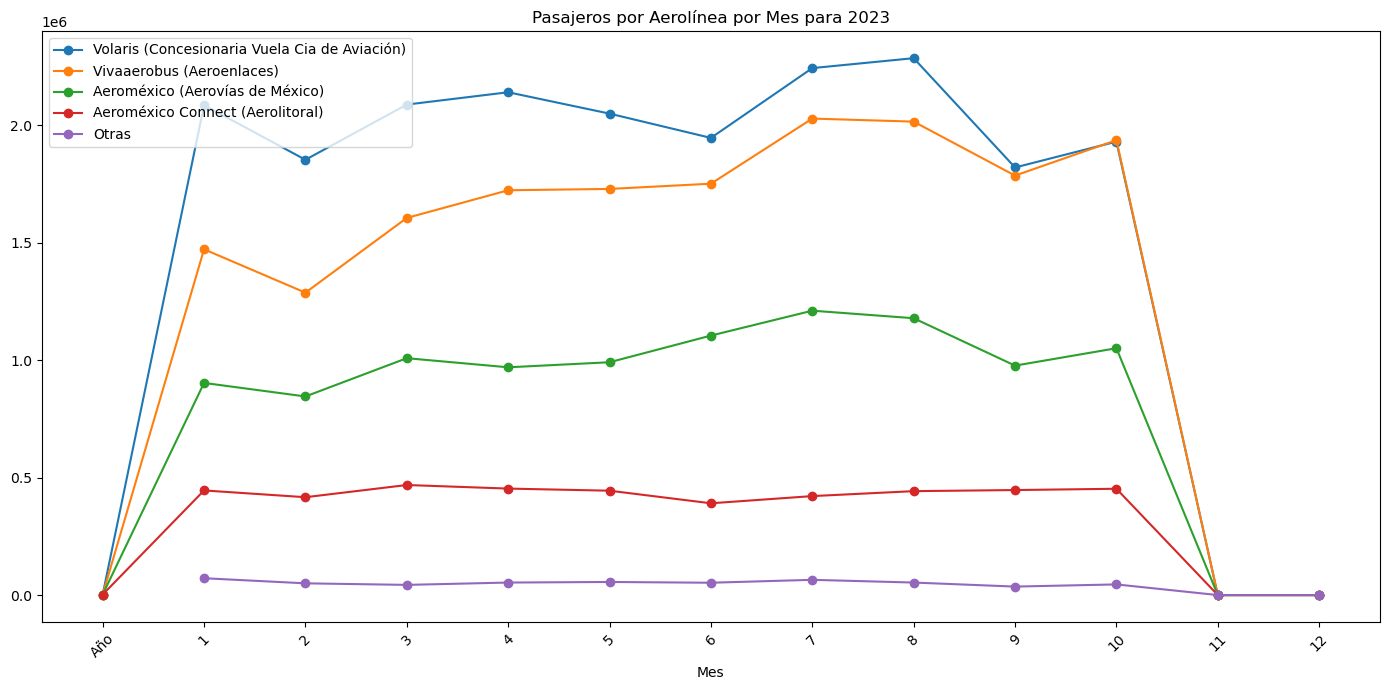

In [43]:
data = pd.read_csv('2023.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2023')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


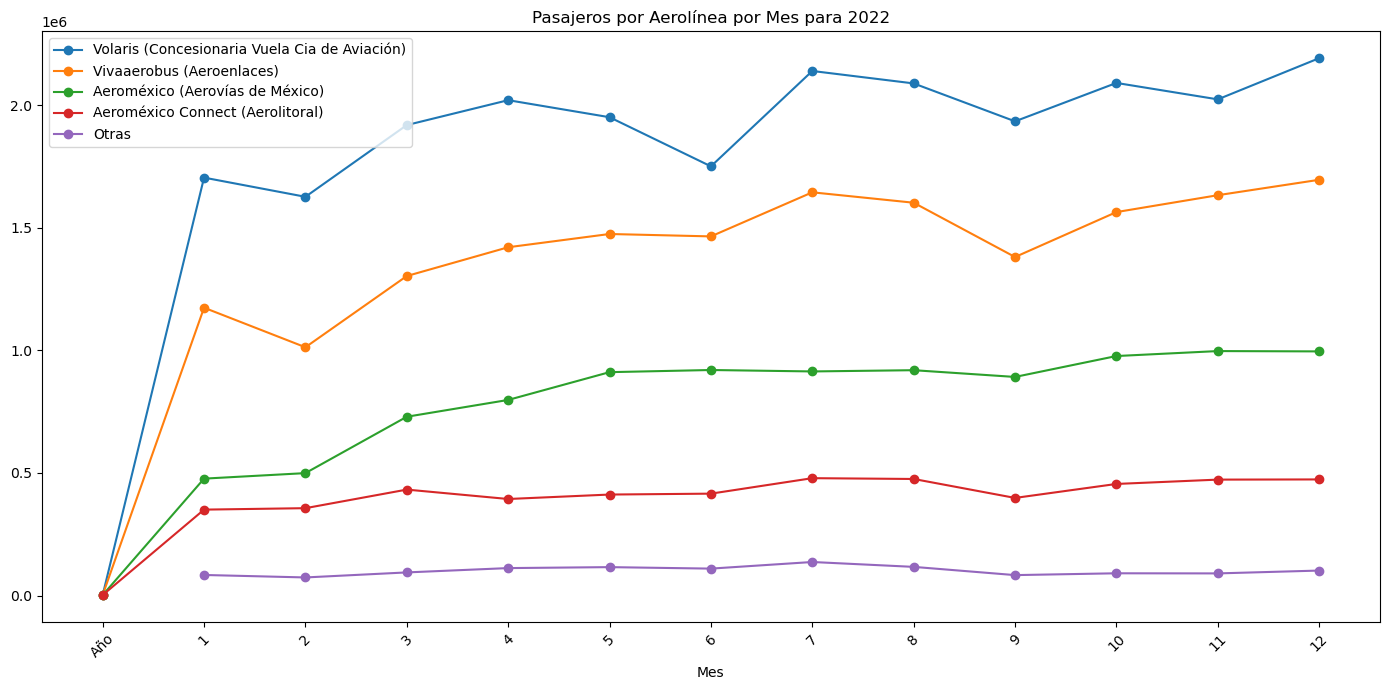

In [44]:
data = pd.read_csv('2022.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2022')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

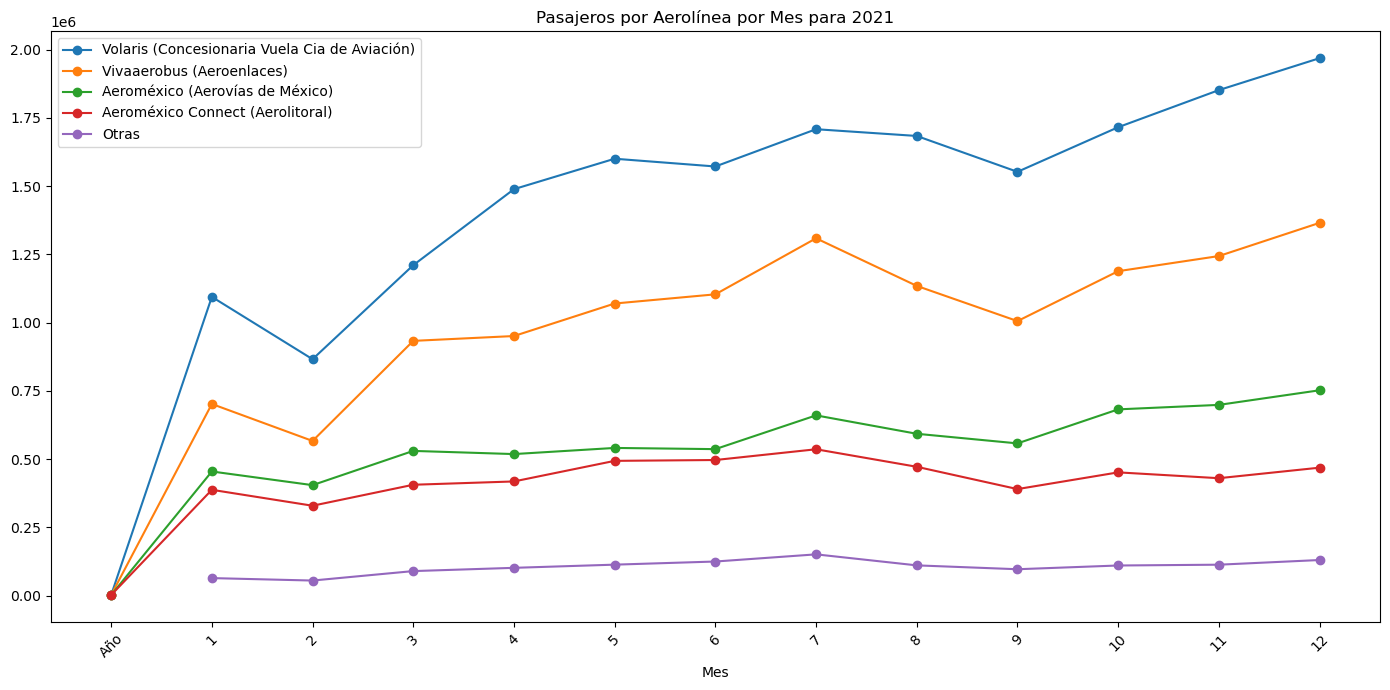

In [45]:
data = pd.read_csv('2021.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2021')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

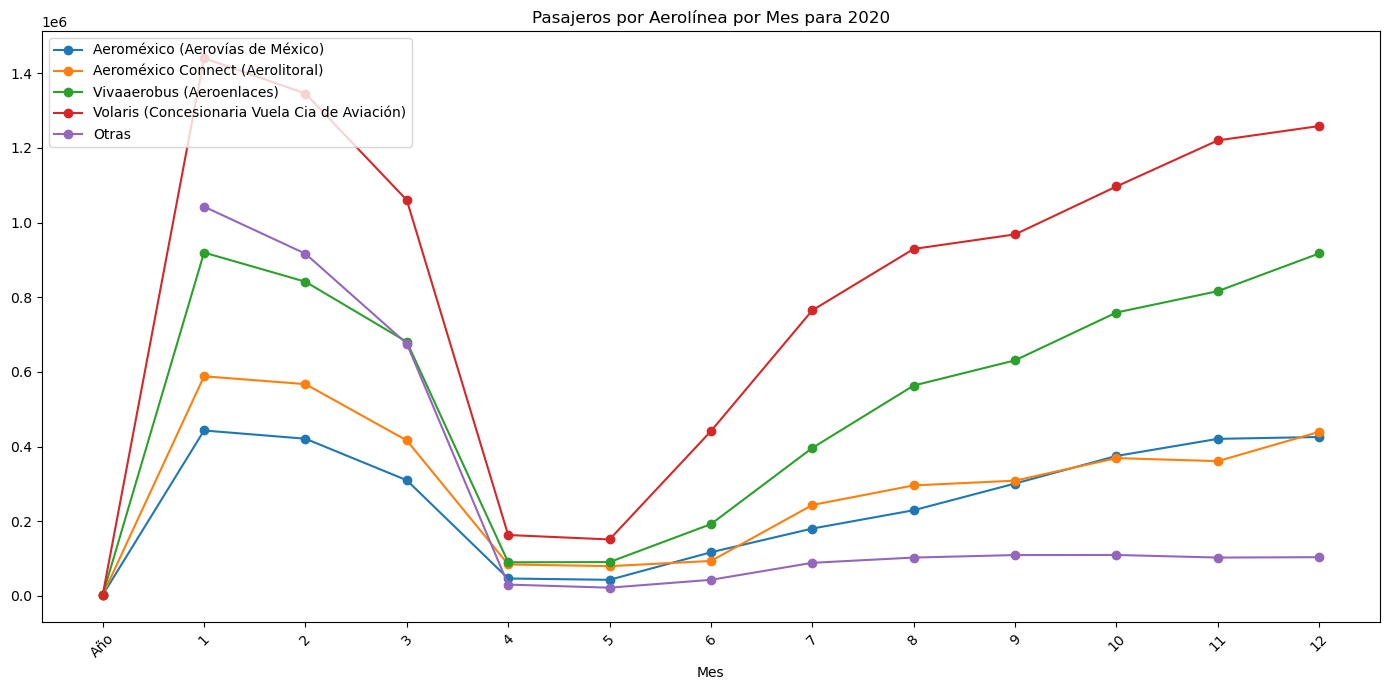

In [46]:
data = pd.read_csv('2020.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2020')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

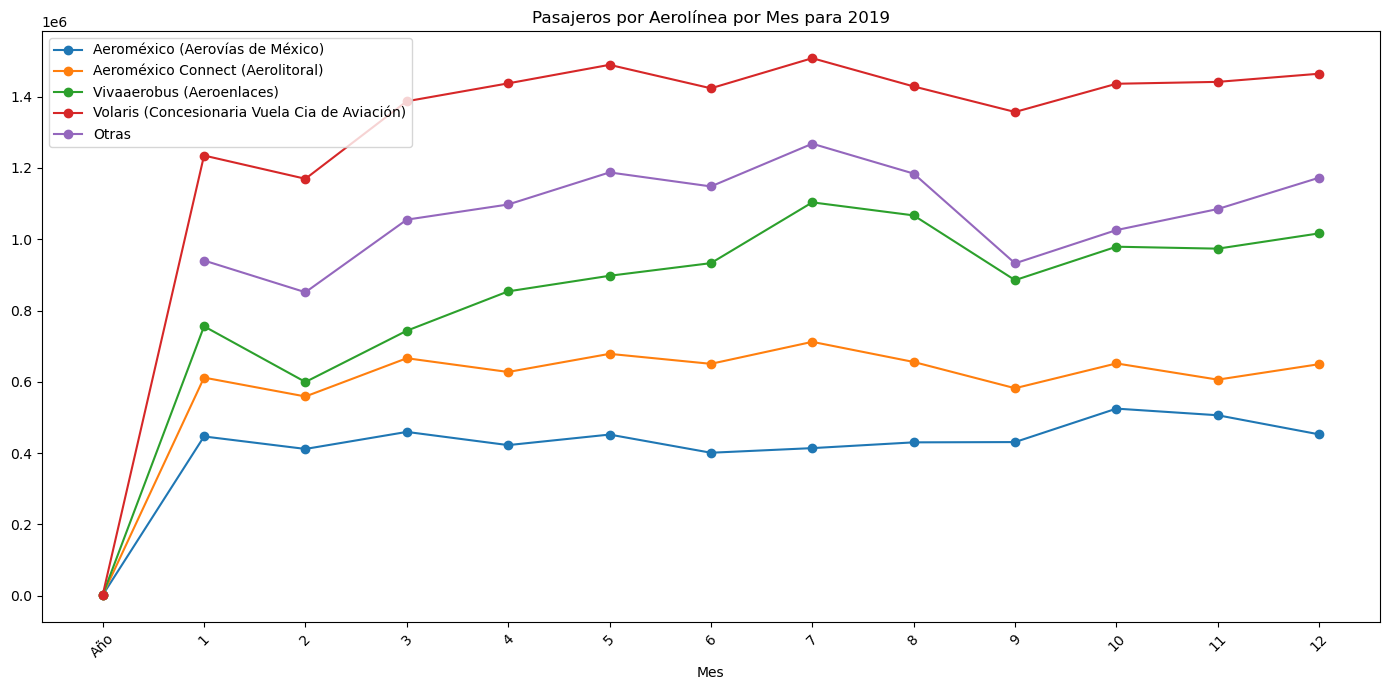

In [47]:
data = pd.read_csv('2019.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2019')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

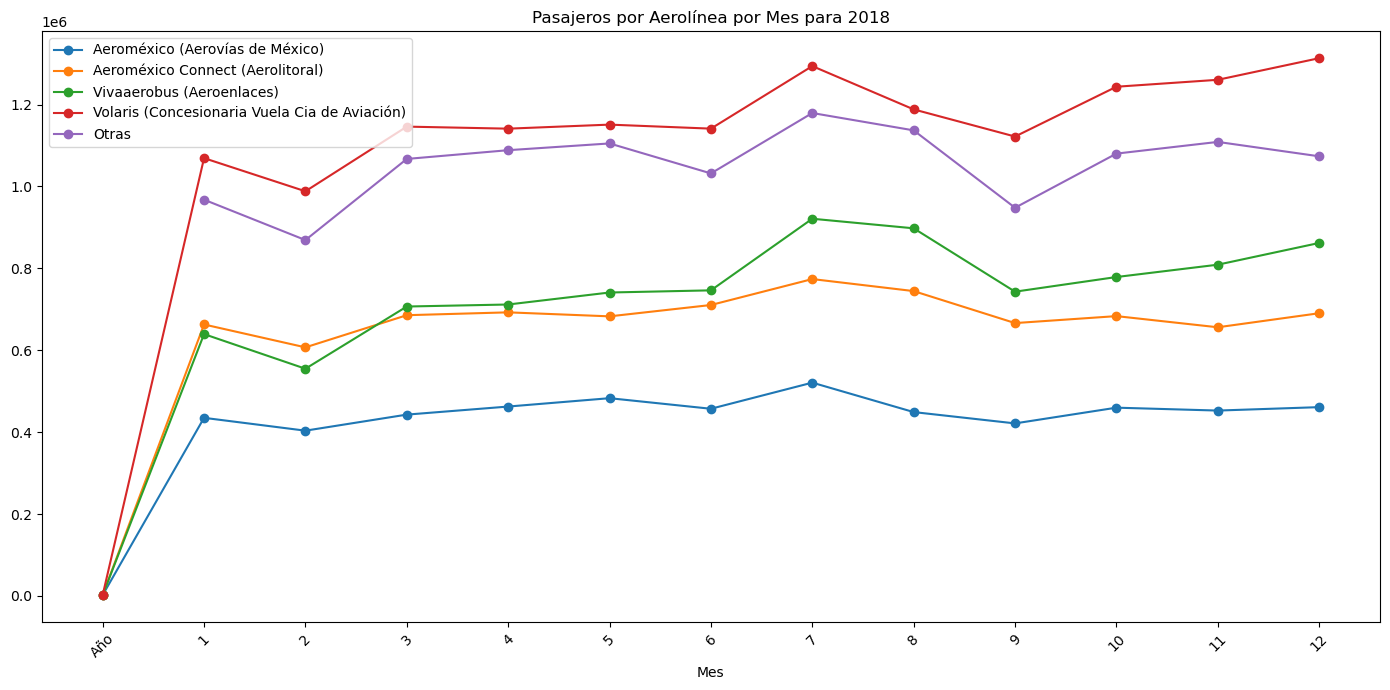

In [48]:
data = pd.read_csv('2018.csv')

# Quitamos la columna de 'Total / Total'
data = data.drop('Total / Total', axis=1)

# Define the airlines to keep separate
airlines_to_keep = [
    'Volaris (Concesionaria Vuela Cia de Aviación)',
    'Vivaaerobus (Aeroenlaces)',
    'Aeroméxico (Aerovías de México)',
    'Aeroméxico Connect (Aerolitoral)'
]

# Separate the specified airlines
specified_airlines_data = data[data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]

# Aggregate other airlines
other_airlines_data = data[~data['E m p r e s a / Air Carrier'].isin(airlines_to_keep)]
other_airlines_data = other_airlines_data.drop(['Año', 'E m p r e s a / Air Carrier'], axis=1).sum()
other_airlines_data = pd.DataFrame(other_airlines_data).transpose()
other_airlines_data['E m p r e s a / Air Carrier'] = 'Otras'

# Combine the data
combined_data = pd.concat([specified_airlines_data, other_airlines_data])

# Set the 'E m p r e s a / Air Carrier' as index
combined_data = combined_data.set_index('E m p r e s a / Air Carrier')

# Plotting the graph
plt.figure(figsize=(14,7))

# Plot each airline's monthly passenger count
for airline in combined_data.index:
    plt.plot(combined_data.columns, combined_data.loc[airline], marker='o', label=airline)

# Adding titles and labels
plt.title('Pasajeros por Aerolínea por Mes para 2018')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

## Historico de las 3 aerolineas mas importantes de mexico actualmente

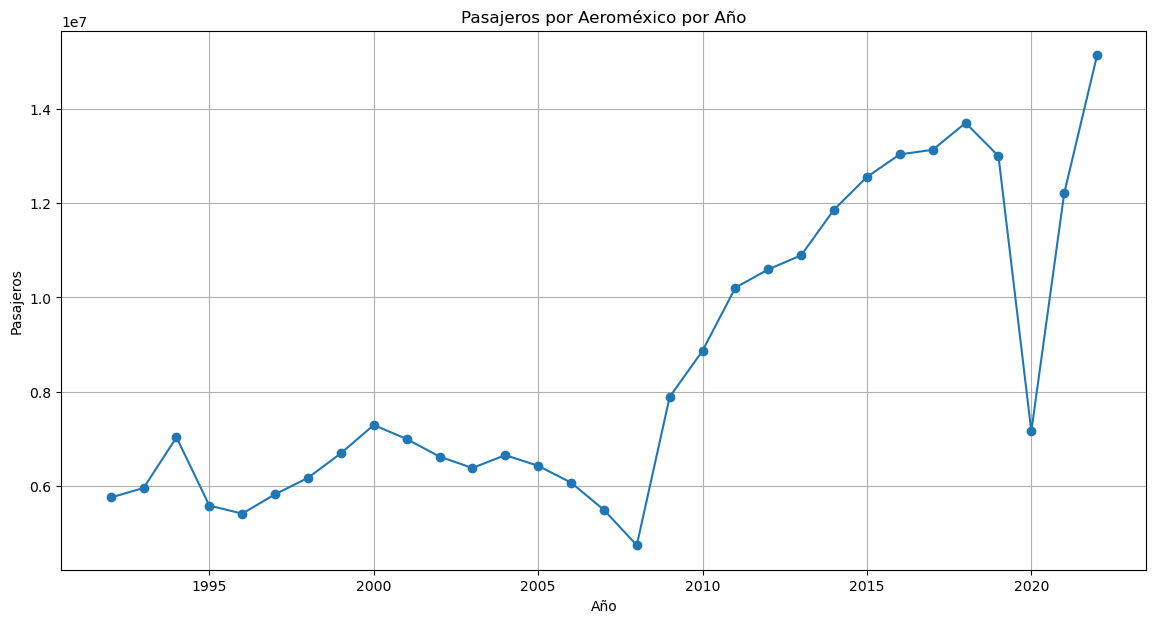

In [49]:
aeromexico_subset = airles_subsets['Aeroméxico']

# Agrupamos por año y sumamos los pasajeros para obtener el total anual
aeromexico_annual = aeromexico_subset.groupby('Año')['Pasajeros'].sum().reset_index()

# Graficamos el histórico de pasajeros de Aeroméxico por año
plt.figure(figsize=(14,7))
plt.plot(aeromexico_annual['Año'], aeromexico_annual['Pasajeros'], marker='o')
plt.title('Pasajeros por Aeroméxico por Año')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.show()


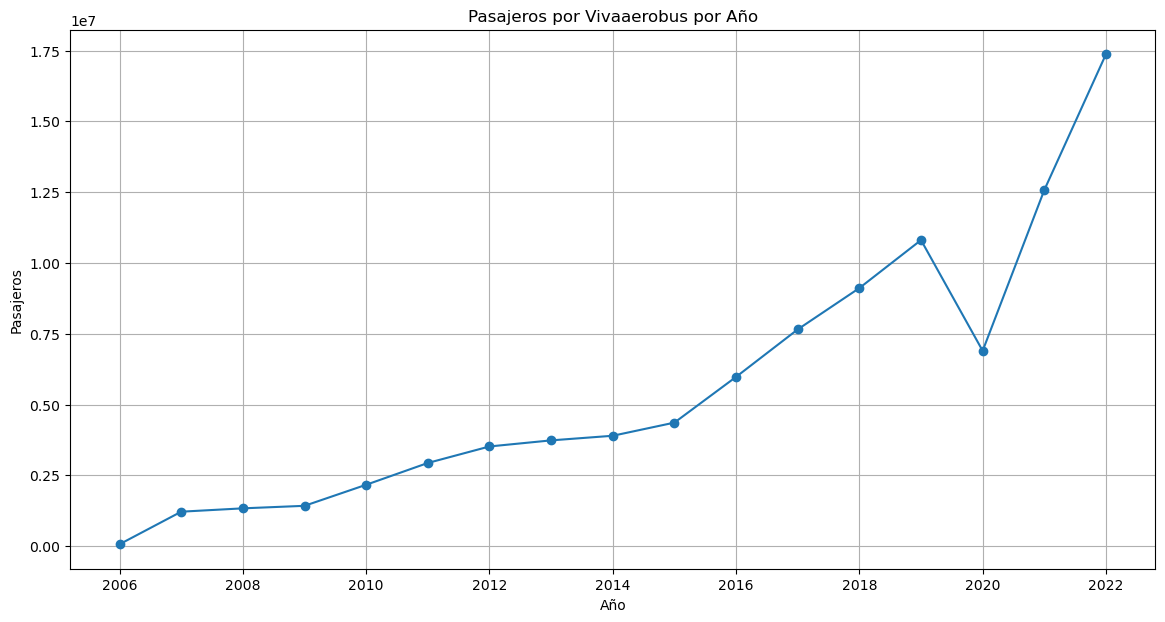

In [50]:
vivaaerobus_subset = airles_subsets['Vivaaerobus']

# Agrupamos por año y sumamos los pasajeros para obtener el total anual
vivaaerobus_annual = vivaaerobus_subset.groupby('Año')['Pasajeros'].sum().reset_index()

# Graficamos el histórico de pasajeros de Aeroméxico por año
plt.figure(figsize=(14,7))
plt.plot(vivaaerobus_annual['Año'], vivaaerobus_annual['Pasajeros'], marker='o')
plt.title('Pasajeros por Vivaaerobus por Año')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.show()

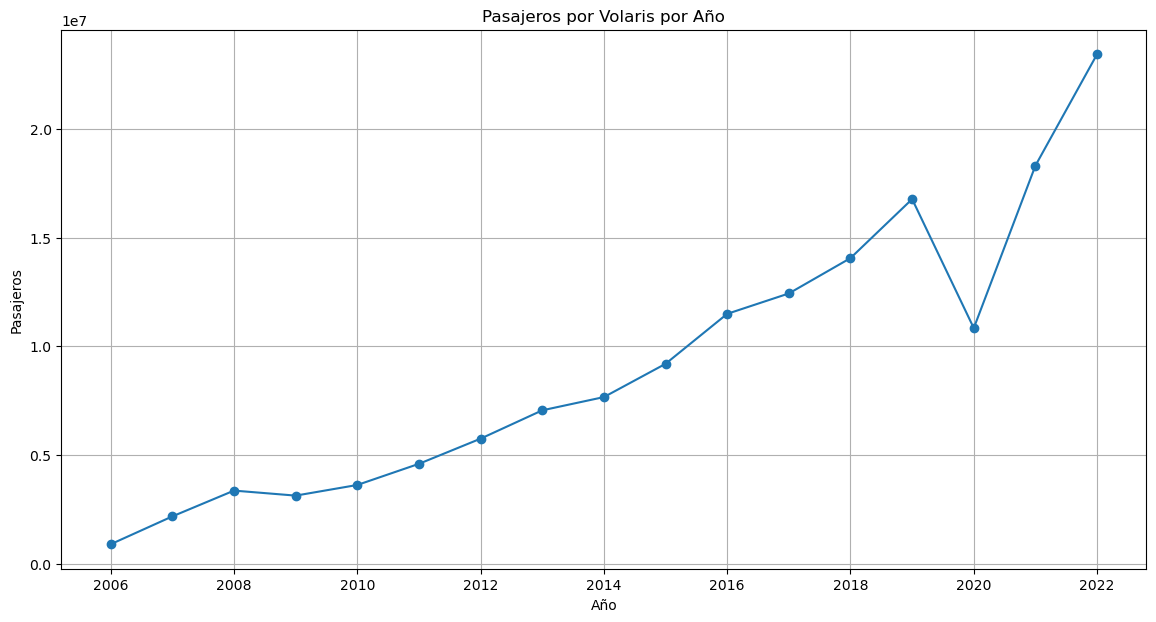

In [51]:
volaris_subset = airles_subsets['Volaris']

# Agrupamos por año y sumamos los pasajeros para obtener el total anual
volaris_annual = volaris_subset.groupby('Año')['Pasajeros'].sum().reset_index()

# Graficamos el histórico de pasajeros de Aeroméxico por año
plt.figure(figsize=(14,7))
plt.plot(volaris_annual['Año'], volaris_annual['Pasajeros'], marker='o')
plt.title('Pasajeros por Volaris por Año')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.show()


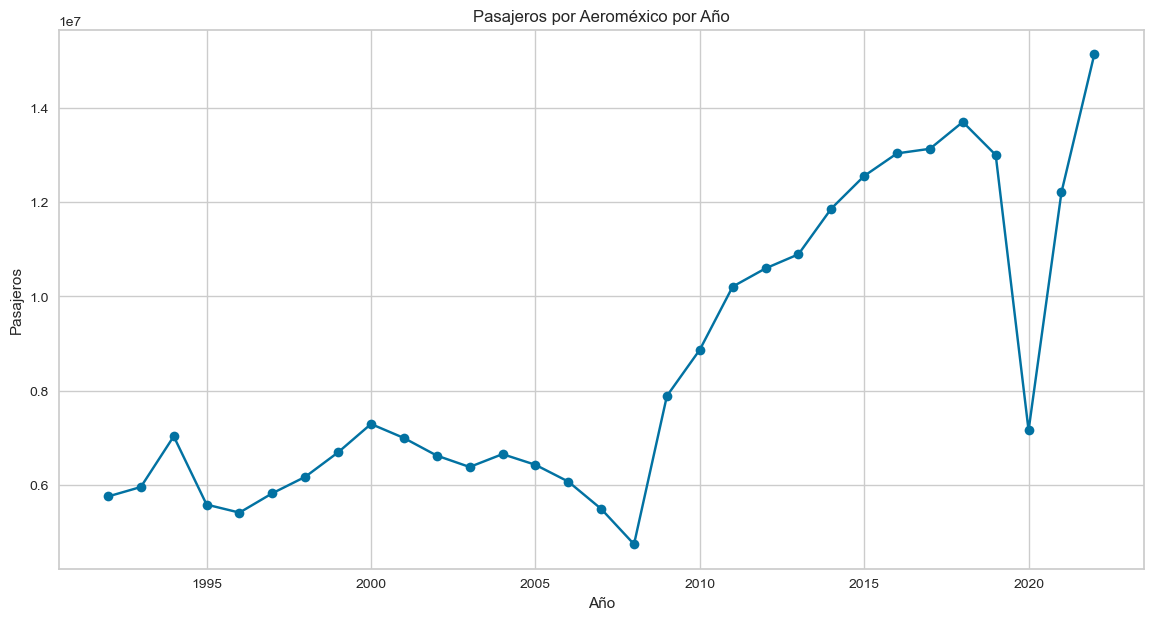

In [67]:
#Las aerolineas se pudieron recuperar despues de la pandemia

#Aeromexico
aeromexico_subset = airles_subsets['Aeroméxico']

# Agrupamos por año y sumamos los pasajeros para obtener el total anual
aeromexico_annual = aeromexico_subset.groupby('Año')['Pasajeros'].sum().reset_index()

# Graficamos el histórico de pasajeros de Aeroméxico por año
plt.figure(figsize=(14,7))
plt.plot(aeromexico_annual['Año'], aeromexico_annual['Pasajeros'], marker='o')
plt.title('Pasajeros por Aeroméxico por Año')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.show()




## Aplicacion del modelo ARIMA

In [52]:
""" Aeromexico_subset = airles_subsets['Aeroméxico']

# Eliminamos la columna de 'Aerolinea'
Aeromexico_subset = Aeromexico_subset.drop('Aerolinea', axis=1)

# Juntamos la columna Año y Mes en una sola columna
Aeromexico_subset['Fecha'] = Aeromexico_subset['Año'].astype(str) + '-' + Aeromexico_subset['Mes'].astype(str)

# Eliminamos las columnas de Año y Mes
Aeromexico_subset = Aeromexico_subset.drop(['Año', 'Mes'], axis=1)

# Ponemos primero la columna de Fecha
Aeromexico_subset = Aeromexico_subset[['Fecha', 'Pasajeros']]

#Guardamos el dataframe en un csv
Aeromexico_subset.to_csv('Aeromexico_subset.csv', index=False) """

" Aeromexico_subset = airles_subsets['Aeroméxico']\n\n# Eliminamos la columna de 'Aerolinea'\nAeromexico_subset = Aeromexico_subset.drop('Aerolinea', axis=1)\n\n# Juntamos la columna Año y Mes en una sola columna\nAeromexico_subset['Fecha'] = Aeromexico_subset['Año'].astype(str) + '-' + Aeromexico_subset['Mes'].astype(str)\n\n# Eliminamos las columnas de Año y Mes\nAeromexico_subset = Aeromexico_subset.drop(['Año', 'Mes'], axis=1)\n\n# Ponemos primero la columna de Fecha\nAeromexico_subset = Aeromexico_subset[['Fecha', 'Pasajeros']]\n\n#Guardamos el dataframe en un csv\nAeromexico_subset.to_csv('Aeromexico_subset.csv', index=False) "

In [53]:
Aeromexico = pd.read_csv('Aeromexico_subset.csv')

In [54]:
Aeromexico.head()

,Fecha,Pasajeros
0,1992-1,427833
1,1992-2,428738
2,1992-3,444647
3,1992-4,451556
4,1992-5,478995


## Apicamos una prueba de estacionalidad

In [55]:
# Aplicamos la prueba de Dickey-Fuller aumentada (ADF) para comprobar si la serie de tiempo es estacionaria
from statsmodels.tsa.stattools import adfuller

serie_temporal = Aeromexico['Pasajeros']

# Realizar la Prueba de Dickey-Fuller Aumentada
resultado_adf = adfuller(serie_temporal)

print('Estadístico de Prueba:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Número de Retrasos Utilizados:', resultado_adf[2])
print('Número de Observaciones Utilizadas:', resultado_adf[3])
print('Valores Críticos:')
for key, value in resultado_adf[4].items():
    print(f'    {key}: {value}')

# Interpretar el resultado
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

Estadístico de Prueba: -0.5992916994975596
p-valor: 0.8711419934579778
Número de Retrasos Utilizados: 13
Número de Observaciones Utilizadas: 358
Valores Críticos:
    1%: -3.448748905151901
    5%: -2.8696473721448728
    10%: -2.5710891239349585
La serie no es estacionaria.


## Ajuste del modelo por diferenciacion

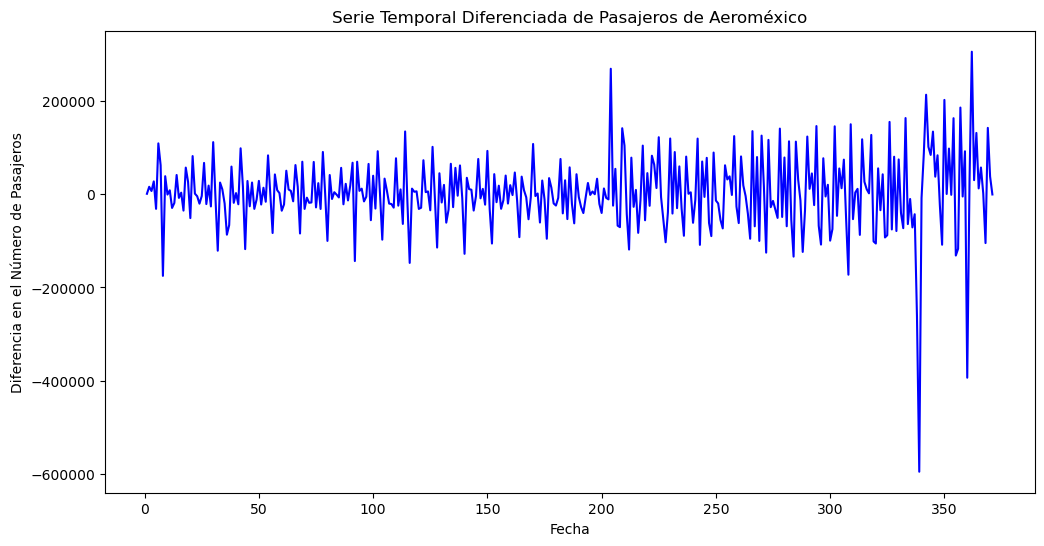

In [56]:
# Diferenciar la serie temporal
Aeromexico['Pasajeros_diferenciados'] = Aeromexico['Pasajeros'].diff()

# Eliminar valores NaN resultantes de la diferenciación
aeromexico_filtered_data = Aeromexico.dropna()

# Visualización de la serie temporal diferenciada
plt.figure(figsize=(12, 6))
plt.plot(aeromexico_filtered_data['Pasajeros_diferenciados'], color='blue')
plt.title('Serie Temporal Diferenciada de Pasajeros de Aeroméxico')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en el Número de Pasajeros')
plt.show()


In [57]:
#Volvemos a ver la estacionariedad de la serie temporal
from statsmodels.tsa.stattools import adfuller

serie_temporal = aeromexico_filtered_data['Pasajeros_diferenciados']

# Realizar la Prueba de Dickey-Fuller Aumentada
resultado_adf = adfuller(serie_temporal)

print('Estadístico de Prueba:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Número de Retrasos Utilizados:', resultado_adf[2])
print('Número de Observaciones Utilizadas:', resultado_adf[3])
print('Valores Críticos:')
for key, value in resultado_adf[4].items():
    print(f'    {key}: {value}')
    
# Interpretar el resultado
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")
    

Estadístico de Prueba: -6.614578466895328
p-valor: 6.253750624035765e-09
Número de Retrasos Utilizados: 12
Número de Observaciones Utilizadas: 358
Valores Críticos:
    1%: -3.448748905151901
    5%: -2.8696473721448728
    10%: -2.5710891239349585
La serie es estacionaria.


In [58]:
from statsmodels.tsa.arima.model import ARIMA

modelo_arima = ARIMA(aeromexico_filtered_data['Pasajeros'], order=(1, 1, 2))

# Entrenar (ajustar) el modelo
modelo_arima_ajustado = modelo_arima.fit()

# Resumen del modelo
print(modelo_arima_ajustado.summary())


                               SARIMAX Results                                
Dep. Variable:              Pasajeros   No. Observations:                  371
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4694.182
Date:                Mon, 24 Jun 2024   AIC                           9396.364
Time:                        14:29:15   BIC                           9412.018
Sample:                             0   HQIC                          9402.582
                                - 371                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6870      0.101     -6.800      0.000      -0.885      -0.489
ma.L1          0.5838      0.105      5.587      0.000       0.379       0.789
ma.L2         -0.2131      0.035     -6.103      0.0

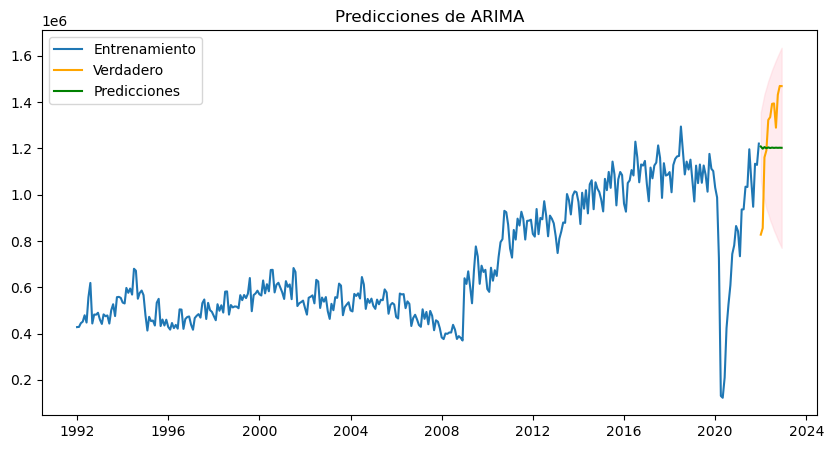

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Aeromexico_subset.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

# Dividir los datos en entrenamiento y prueba
# Aquí estoy asumiendo que quieres usar los últimos 12 meses de datos como conjunto de prueba
train = df['Pasajeros'][:-12]
test = df['Pasajeros'][-12:]

# Ajustar el modelo ARIMA
# Los parámetros (p, d, q) deben ser elegidos basados en tu análisis previo y pruebas de estacionariedad
modelo = ARIMA(train, order=(1, 1, 2))
modelo_ajustado = modelo.fit()

# Realizar predicciones
predicciones = modelo_ajustado.get_forecast(steps=12)
predicciones_int = predicciones.conf_int()
predicciones_media = predicciones.predicted_mean

# Visualizar las predicciones en comparación con el conjunto de prueba
plt.figure(figsize=(10, 5))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Verdadero', color='orange')
plt.plot(predicciones_media, label='Predicciones', color='green')
plt.fill_between(predicciones_int.index, 
                 predicciones_int.iloc[:, 0], 
                 predicciones_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Predicciones de ARIMA')
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular MSE y MAE
mse = mean_squared_error(test, predicciones_media)
mae = mean_absolute_error(test, predicciones_media)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')


Error Cuadrático Medio (MSE): 47673900206.43066
Error Absoluto Medio (MAE): 188398.17141694765


### Analisis sin conteemplar el año 2020

In [61]:
Aeromexico2 = pd.read_csv('Aeromexico_subset_2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Aeromexico_subset_2.csv'

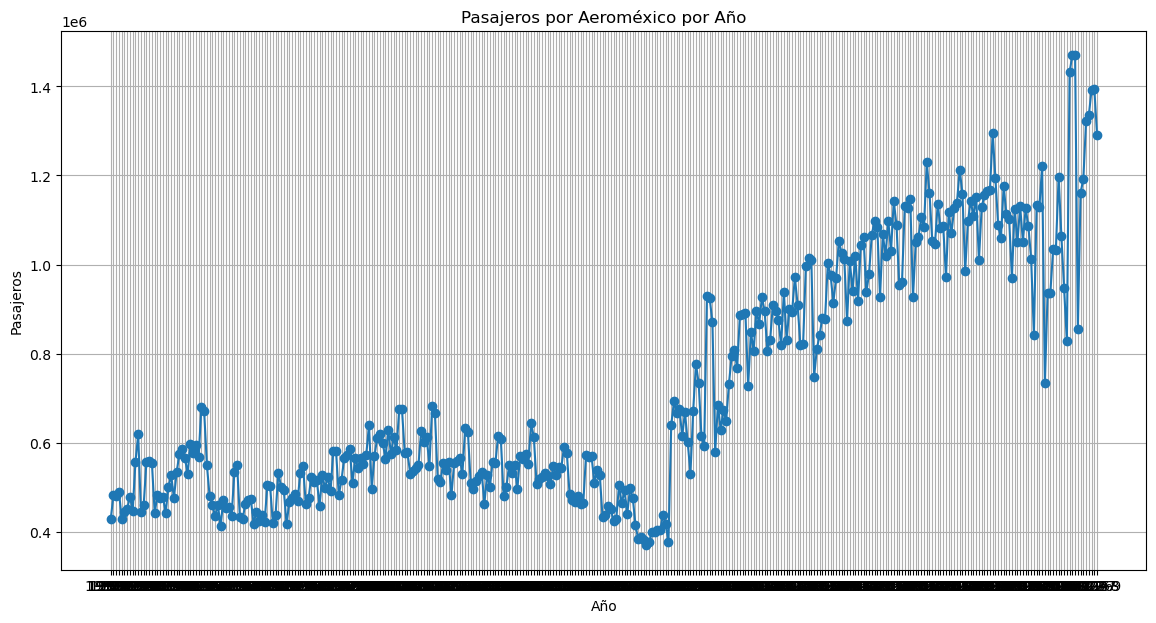

In [ ]:
# Graficamos los pasaajeros por mes
aeromexico_annual = Aeromexico2.groupby('Fecha')['Pasajeros'].sum().reset_index()

# Graficamos el histórico de pasajeros de Aeroméxico por año
plt.figure(figsize=(14,7))
plt.plot(aeromexico_annual['Fecha'], aeromexico_annual['Pasajeros'], marker='o')
plt.title('Pasajeros por Aeroméxico por Año')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.grid(True)
plt.show()



In [ ]:
# Aplicamos la prueba de Dickey-Fuller aumentada (ADF) para comprobar si la serie de tiempo es estacionaria
from statsmodels.tsa.stattools import adfuller

serie_temporal = Aeromexico2['Pasajeros']

# Realizar la Prueba de Dickey-Fuller Aumentada
resultado_adf = adfuller(serie_temporal)

print('Estadístico de Prueba:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Número de Retrasos Utilizados:', resultado_adf[2])
print('Número de Observaciones Utilizadas:', resultado_adf[3])
print('Valores Críticos:')
for key, value in resultado_adf[4].items():
    print(f'    {key}: {value}')

# Interpretar el resultado
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

Estadístico de Prueba: 0.2564457482520202
p-valor: 0.9752555911579476
Número de Retrasos Utilizados: 12
Número de Observaciones Utilizadas: 347
Valores Críticos:
    1%: -3.449336554273722
    5%: -2.8699055166063085
    10%: -2.571226758215748
La serie no es estacionaria.


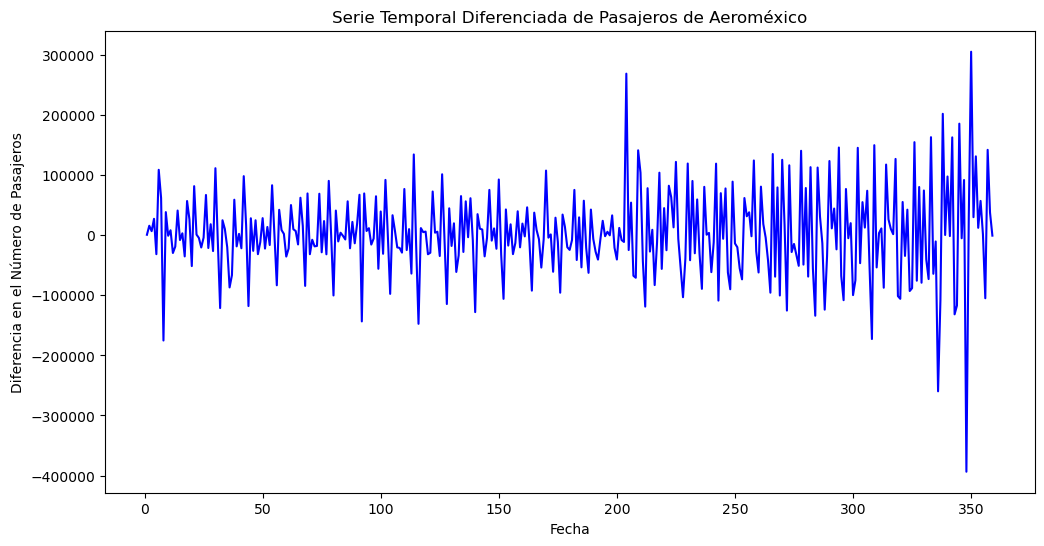

In [ ]:
# Diferenciar la serie temporal
Aeromexico2['Pasajeros_diferenciados'] = Aeromexico2['Pasajeros'].diff()

# Eliminar valores NaN resultantes de la diferenciación
aeromexico_filtered_data2 = Aeromexico2.dropna()

# Visualización de la serie temporal diferenciada
plt.figure(figsize=(12, 6))
plt.plot(aeromexico_filtered_data2['Pasajeros_diferenciados'], color='blue')
plt.title('Serie Temporal Diferenciada de Pasajeros de Aeroméxico')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en el Número de Pasajeros')
plt.show()

In [ ]:
# Realizar una segunda diferenciación
serie_temporal_diferenciada_2 = aeromexico_filtered_data2['Pasajeros'].diff().diff().dropna()

# Realizar la prueba de Dickey-Fuller aumentada en la serie diferenciada dos veces
resultado_adf_diferenciada_2 = adfuller(serie_temporal_diferenciada_2)

print('Estadístico de Prueba:', resultado_adf_diferenciada_2[0])
print('p-valor:', resultado_adf_diferenciada_2[1])
print('Número de Retrasos Utilizados:', resultado_adf_diferenciada_2[2])
print('Número de Observaciones Utilizadas:', resultado_adf_diferenciada_2[3])
print('Valores Críticos:')
for key, value in resultado_adf_diferenciada_2[4].items():
    print(f'    {key}: {value}')

# Interpretar el resultado
if resultado_adf_diferenciada_2[1] < 0.05:
    print("La serie diferenciada dos veces es estacionaria.")
else:
    print("La serie diferenciada dos veces no es estacionaria.")


Estadístico de Prueba: -7.457763231358043
p-valor: 5.454915265959609e-11
Número de Retrasos Utilizados: 17
Número de Observaciones Utilizadas: 339
Valores Críticos:
    1%: -3.4497880749874628
    5%: -2.870103829170425
    10%: -2.571332495975496
La serie diferenciada dos veces es estacionaria.


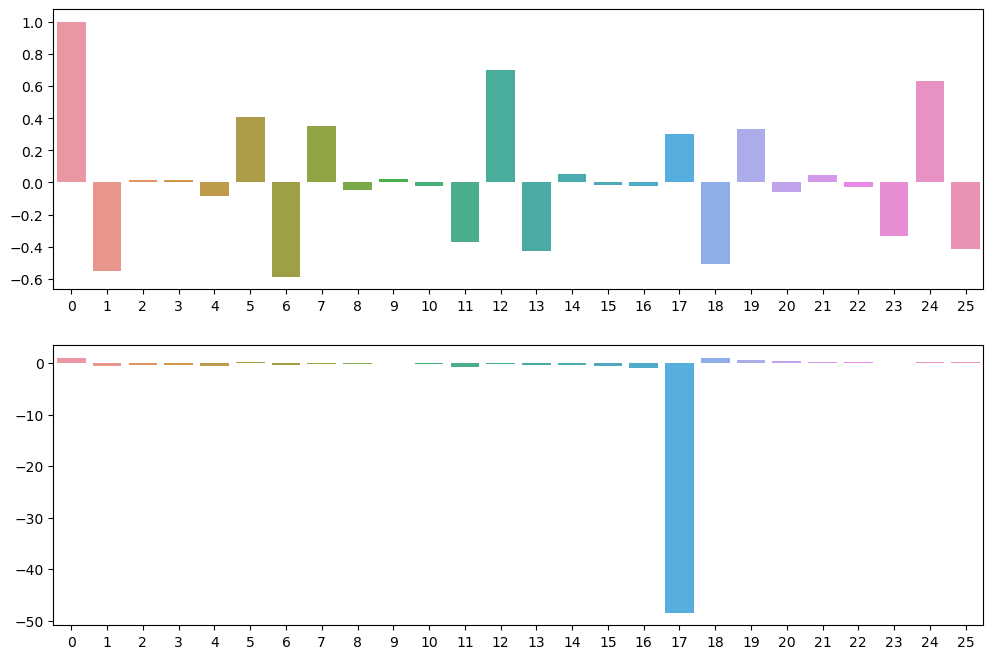

c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\User

Error Cuadrático Medio (MSE): 98256201590.0316
Error Absoluto Medio (MAE): 242890.56294908407


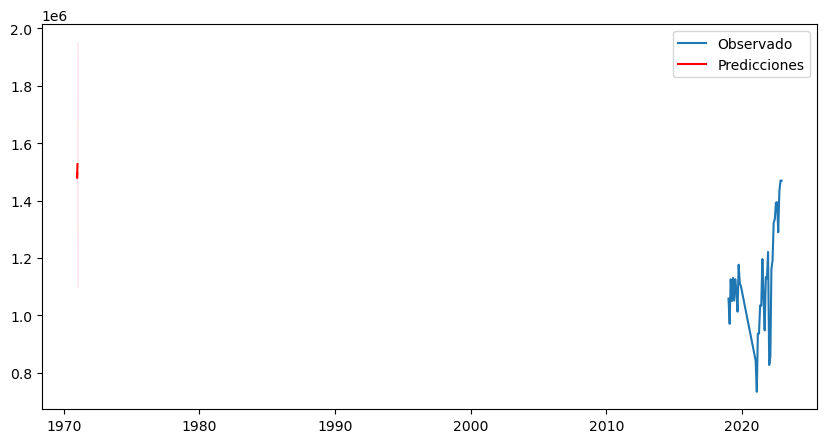

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('Aeromexico_subset_2.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

# Excluir el año 2020 y realizar dos diferenciaciones
df = df[df.index.year != 2020]
df['Pasajeros_dif'] = df['Pasajeros'].diff().diff().dropna()

# Determinar p y q usando ACF y PACF
lags = 40
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
acf_vals = acf(df['Pasajeros_dif'].dropna())
pacf_vals = pacf(df['Pasajeros_dif'].dropna())
sns.barplot(x=[x for x in range(len(acf_vals))], y=acf_vals, ax=ax1)
sns.barplot(x=[x for x in range(len(pacf_vals))], y=pacf_vals, ax=ax2)
plt.show()

# Ajustar el modelo ARIMA
modelo = ARIMA(df['Pasajeros'], order=(2, 2, 2))
modelo_ajustado = modelo.fit()

# Realizar predicciones
predicciones = modelo_ajustado.get_forecast(steps=12)  # Ajusta el número de pasos según sea necesario
predicciones_int = predicciones.conf_int()
predicciones_media = predicciones.predicted_mean

# Calcular métricas de rendimiento
mse = mean_squared_error(df['Pasajeros'][-12:], predicciones_media)
mae = mean_absolute_error(df['Pasajeros'][-12:], predicciones_media)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')

# Visualizar las predicciones
plt.figure(figsize=(10, 5))
plt.plot(df['Pasajeros'][-36:], label='Observado')
plt.plot(predicciones_media, label='Predicciones', color='red')
plt.fill_between(predicciones_int.index,
                 predicciones_int.iloc[:, 0],
                 predicciones_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


# Hasta 2019
# Despues de pandemia
# Perdidas

c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Error Cuadrático Medio (MSE): 47486739465.10212
Error Absoluto Medio (MAE): 192462.1009789256


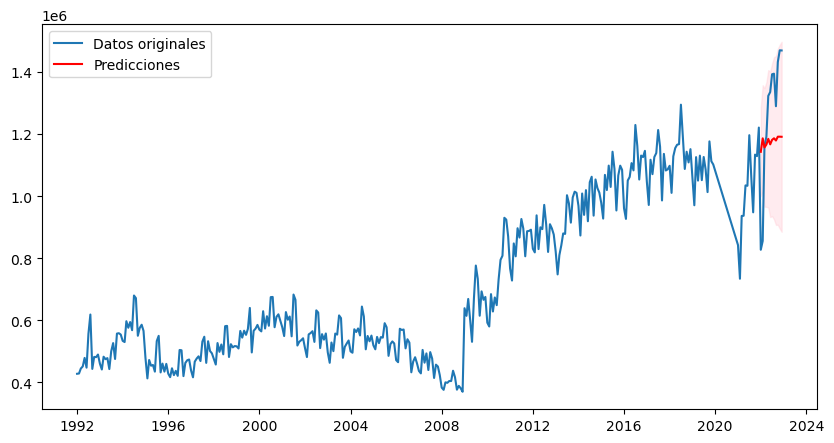

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asumiendo que 'df' es tu DataFrame y que la columna 'Pasajeros' contiene tus datos

# Cargar los datos
df = pd.read_csv('Aeromexico_subset.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

# Excluir el año 2020
df = df[df.index.year != 2020]

# Diferenciar dos veces para hacer la serie estacionaria
df['Pasajeros_dif'] = df['Pasajeros'].diff().diff().dropna()

p, d, q = 2, 2, 4

# Dividir en entrenamiento y prueba
n_test = 12
train = df['Pasajeros'][:-n_test]
test = df['Pasajeros'][-n_test:]

# Entrenar el modelo ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.get_forecast(steps=n_test)
predictions_mean = predictions.predicted_mean
predictions_conf_int = predictions.conf_int()

# Calcular métricas de rendimiento
mse = mean_squared_error(test, predictions_mean)
mae = mean_absolute_error(test, predictions_mean)

# Mostrar las métricas de rendimiento
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')

# Visualizar las predicciones
plt.figure(figsize=(10, 5))
plt.plot(df['Pasajeros'], label='Datos originales')
plt.plot(test.index, predictions_mean, label='Predicciones', color='red')
plt.fill_between(test.index,
                 predictions_conf_int.iloc[:, 0],
                 predictions_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


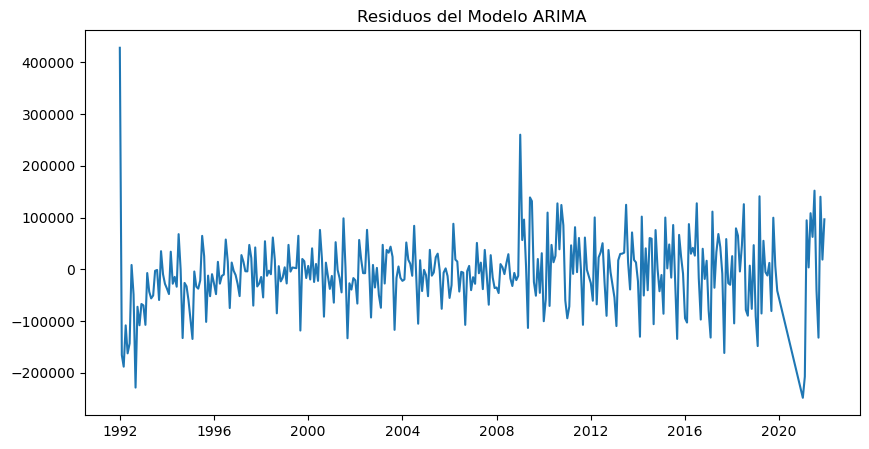

Estadístico de la prueba: 61.71244496676725
P-valor: 3.974777686163229e-14


In [ ]:
# Obtenemos los residuos del modelo ajustado
residuos = model_fit.resid

# Graficamos los residuos
plt.figure(figsize=(10, 5))
plt.plot(residuos)
plt.title('Residuos del Modelo ARIMA')
plt.show()

# También podemos realizar una prueba de normalidad en los residuos
from scipy.stats import normaltest
stat, p = normaltest(residuos)
print('Estadístico de la prueba:', stat)
print('P-valor:', p)


# Aplicacion del moldelo SARIMA para Aeromexico

In [ ]:
aeromexico_data = pd.read_csv('Aeromexico_subset.csv')

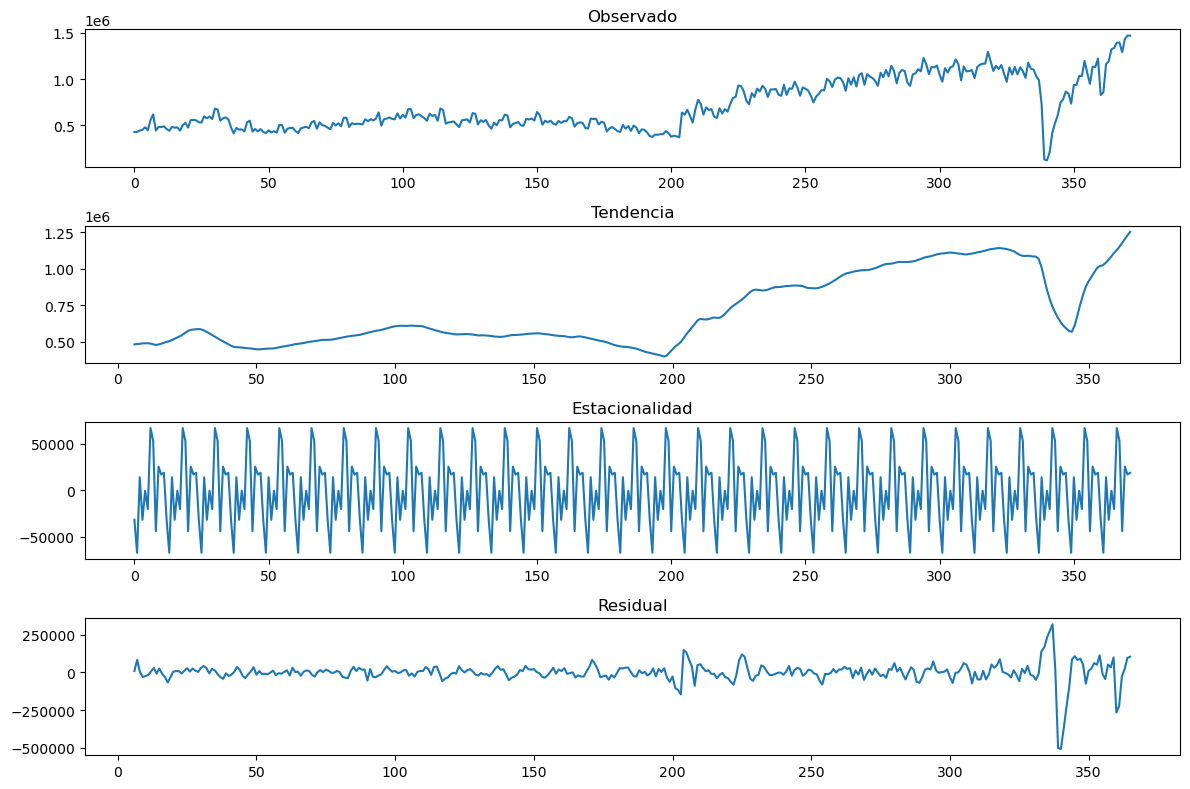

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición estacional de la serie temporal
descomposicion = seasonal_decompose(aeromexico_data['Pasajeros'], model='additive', period=12)

# Graficar los componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
descomposicion.observed.plot(ax=ax1)
ax1.set_title('Observado')
descomposicion.trend.plot(ax=ax2)
ax2.set_title('Tendencia')
descomposicion.seasonal.plot(ax=ax3)
ax3.set_title('Estacionalidad')
descomposicion.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

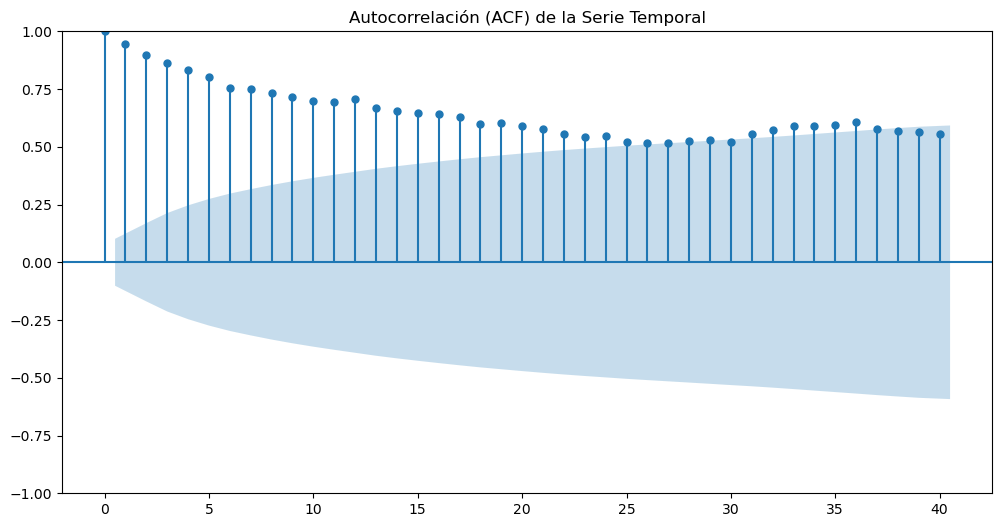

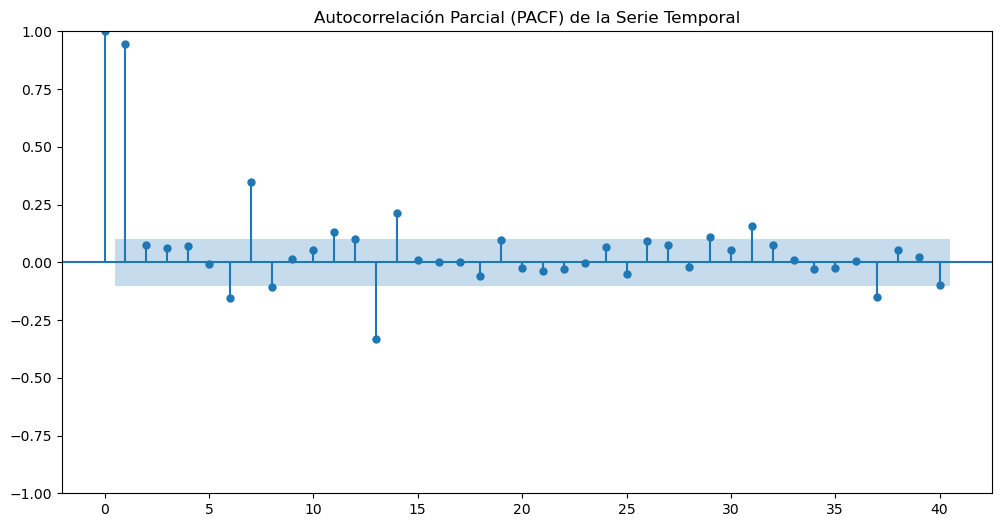

Test Statistic                  -2.354247
p-value                          0.404208
#Lags Used                      13.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.984283
Critical Value (5%)             -3.422825
Critical Value (10%)            -3.134303
dtype: float64

In [ ]:
# Verificar la estacionalidad con una prueba de Dickey-Fuller estacional
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def seasonal_adfuller_test(series, maxlag=None, regression='c', autolag='AIC'):
    """
    Realizar una prueba de Dickey-Fuller estacional.
    """
    dftest = adfuller(series, maxlag=maxlag, regression=regression, autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Realizar la prueba de Dickey-Fuller estacional
resultado_df_estacional = seasonal_adfuller_test(aeromexico_data['Pasajeros'], regression='ct')

# Calcular y graficar la función de autocorrelación (ACF) y autocorrelación parcial (PACF) para la serie temporal
plt.figure(figsize=(12,6))
plot_acf(aeromexico_data['Pasajeros'], lags=40, ax=plt.gca())
plt.title('Autocorrelación (ACF) de la Serie Temporal')
plt.figure(figsize=(12,6))
plot_pacf(aeromexico_data['Pasajeros'], lags=40, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF) de la Serie Temporal')
plt.show()

resultado_df_estacional

In [ ]:
# Ajustar el modelo SARIMA con los parámetros seleccionados
sarima_model = SARIMAX(aeromexico_data['Pasajeros'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Mostrar el resumen del modelo
sarima_summary = sarima_result.summary()
sarima_summary

NameError: name 'SARIMAX' is not defined

In [ ]:
# Ajustando y probando un modelo SARIMA alternativo con diferentes parámetros
# Usaremos SARIMA(2, 1, 2)x(1, 1, 1, 12) como alternativa

sarima_model_alternativo = SARIMAX(aeromexico_data['Pasajeros'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result_alternativo = sarima_model_alternativo.fit()

# Mostrar el resumen del modelo alternativo
sarima_summary_alternativo = sarima_result_alternativo.summary()
sarima_summary_alternativo



NameError: name 'SARIMAX' is not defined

In [ ]:
# Usaremos SARIMA(1, 1, 1)x(1, 1, 1, 12) como alternativa

sarima_model_ajustado = SARIMAX(aeromexico_data['Pasajeros'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result_ajustado = sarima_model_ajustado.fit()

# Mostrar el resumen del modelo ajustado
sarima_summary_ajustado = sarima_result_ajustado.summary()
sarima_summary_ajustado



NameError: name 'SARIMAX' is not defined

C:\Users\diego\AppData\Local\Temp\ipykernel_9636\2324796745.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(223)


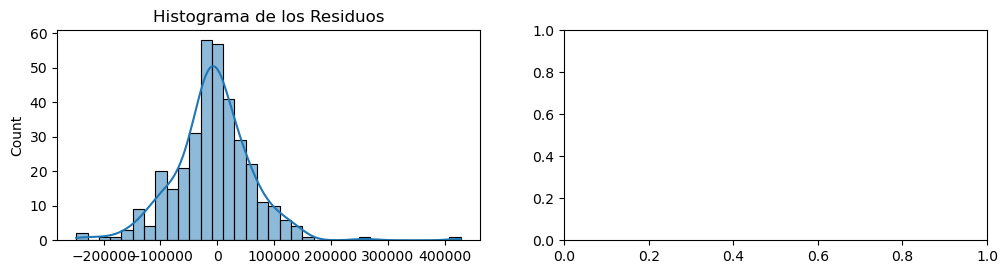

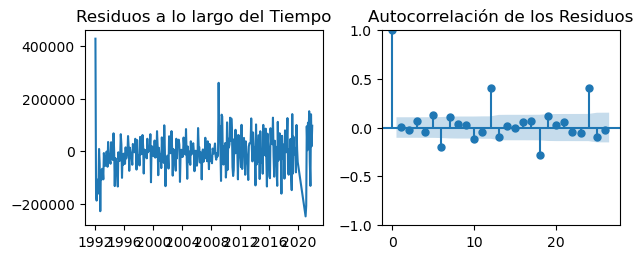

In [ ]:
import statsmodels.api as sm

# Corrigiendo el error y generando nuevamente los gráficos para el análisis de los residuos

# Histograma de los residuos
plt.figure(figsize=(12, 6))
plt.subplot(221)
sns.histplot(residuos, kde=True)
plt.title('Histograma de los Residuos')

# Gráfico Q-Q (Quantile-Quantile) para los residuos
plt.subplot(222)
sm.qqplot(residuos, line='s')
plt.title('Gráfico Q-Q de los Residuos')

# Gráfico de los residuos en el tiempo
plt.subplot(223)
plt.plot(residuos)
plt.title('Residuos a lo largo del Tiempo')

# Autocorrelación de los residuos
plt.subplot(224)
plot_acf(residuos, ax=plt.gca())
plt.title('Autocorrelación de los Residuos')

plt.tight_layout()
plt.show()


In [ ]:
# Convertir la serie de pasajeros a un formato numérico
aeromexico_data['Pasajeros'] = pd.to_numeric(aeromexico_data['Pasajeros'], errors='coerce')

# Eliminar posibles valores NaN que se hayan introducido con la conversión
aeromexico_data.dropna(inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = aeromexico_data['Pasajeros'][:train_size], aeromexico_data['Pasajeros'][train_size:]

# Ajustar el modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(len(test))

# Calcular y mostrar el RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE:', rmse)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Real')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.show()



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Configuración de la validación cruzada de series temporales
tscv = TimeSeriesSplit(n_splits=5)

# Variables para almacenar las métricas de rendimiento
rmse_scores = []

# Validación cruzada de series temporales
for train_index, test_index in tscv.split(aeromexico_data['Pasajeros']):
    cv_train, cv_test = aeromexico_data['Pasajeros'].iloc[train_index], aeromexico_data['Pasajeros'].iloc[test_index]
    
    # Ajustar el modelo SARIMA
    model = SARIMAX(cv_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Realizar predicciones
    predictions = model_fit.forecast(len(cv_test))
    
    # Calcular el RMSE y almacenarlo
    rmse_score = np.sqrt(mean_squared_error(cv_test, predictions))
    rmse_scores.append(rmse_score)

# Imprimir los resultados de RMSE para cada división
for i, score in enumerate(rmse_scores, 1):
    print(f'Split {i} RMSE: {score}')

# Calcular el RMSE medio de todas las divisiones
mean_rmse = np.mean(rmse_scores)
print(f'\nMean RMSE across all splits: {mean_rmse}')


c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\diego\anaconda

Split 1 RMSE: 93339.47642684562
Split 2 RMSE: 31742.476958585845
Split 3 RMSE: 380175.61781486776
Split 4 RMSE: 54019.97604059191
Split 5 RMSE: 336887.16617935704

Mean RMSE across all splits: 179232.94268404963


c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


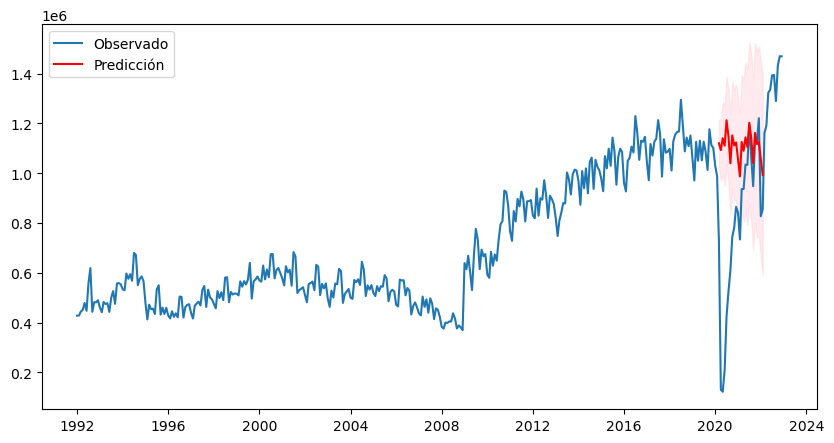

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos
data = pd.read_csv('Aeromexico_subset.csv')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

# Identificar el periodo de impacto del COVID-19
start_covid_impact = '2020-03-01'
end_covid_impact = '2021-06-01'

# Crear una variable dummy para el período de COVID-19
data['Covid_Impact'] = ((data.index >= start_covid_impact) & (data.index <= end_covid_impact)).astype(int)

# Excluir el periodo de impacto del COVID-19
data_recuperacion = data.loc[data.index < start_covid_impact]

# Ajustar un modelo SARIMA con una variable exógena para la pandemia
model = SARIMAX(data_recuperacion['Pasajeros'],
                exog=data_recuperacion[['Covid_Impact']],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

steps = 24 
predictions = results.get_forecast(steps=steps, exog=data[['Covid_Impact']].tail(steps))

# Obtener el pronóstico predicho y los intervalos de confianza
forecasted_values = predictions.predicted_mean
conf_int = predictions.conf_int()

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(data['Pasajeros'], label='Observado')
plt.plot(forecasted_values.index, forecasted_values, label='Predicción', color='red')

# Dibujar los intervalos de confianza
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.legend()
plt.show()





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el RMSE y MAE
mse = mean_squared_error(data['Pasajeros'][:len(forecasted_values)], forecasted_values)
mae = mean_absolute_error(data['Pasajeros'][:len(forecasted_values)], forecasted_values)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')


Error Cuadrático Medio (MSE): 401892729699.37213
Error Absoluto Medio (MAE): 628733.1520122447


In [ ]:
import joblib

# Asumiendo que 'model_fit' es tu modelo SARIMA ajustado
# Guardar el modelo en un archivo
filename = 'sarima_model_aeromexico.sav'
joblib.dump(model_fit, filename)

print(f"Modelo guardado como {filename}")


Modelo guardado como sarima_model_aeromexico.sav


In [ ]:
import joblib

# Asumiendo que 'model_fit' es tu modelo SARIMA ajustado

# Guardar el modelo en disco
filename = 'sarima_model_aeromexico.sav'
joblib.dump(model_fit, filename)

# Más tarde, cargar el modelo desde disco
loaded_model = joblib.load(filename)

# Hacer predicciones con el modelo cargado
# Necesitas proporcionar los pasos de tiempo para las predicciones y cualquier variable exógena si es necesario
# Aquí, 'steps' es el número de periodos de tiempo que quieres predecir
steps = 12
predictions = loaded_model.get_forecast(steps=steps)

# Mostrar las predicciones
print(predictions.predicted_mean)


310    1.135493e+06
311    1.135533e+06
312    1.065820e+06
313    1.011420e+06
314    1.133122e+06
315    1.096511e+06
316    1.148764e+06
317    1.133268e+06
318    1.228034e+06
319    1.188397e+06
320    1.063237e+06
321    1.172386e+06
Name: predicted_mean, dtype: float64


In [ ]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('sarima_model_aeromexico.sav')

# Predecir para el año 2023 (12 meses)
predictions_2023 = loaded_model.get_forecast(steps=12)

# Obtener el valor predicho y los intervalos de confianza
predicted_values_2023 = predictions_2023.predicted_mean
confidence_intervals_2023 = predictions_2023.conf_int()

# Imprimir los valores predichos y los intervalos de confianza
print(predicted_values_2023)
print(confidence_intervals_2023)


310    1.135493e+06
311    1.135533e+06
312    1.065820e+06
313    1.011420e+06
314    1.133122e+06
315    1.096511e+06
316    1.148764e+06
317    1.133268e+06
318    1.228034e+06
319    1.188397e+06
320    1.063237e+06
321    1.172386e+06
Name: predicted_mean, dtype: float64
     lower Pasajeros  upper Pasajeros
310     1.042777e+06     1.228208e+06
311     1.010872e+06     1.260194e+06
312     9.191294e+05     1.212510e+06
313     8.473642e+05     1.175476e+06
314     9.543666e+05     1.311878e+06
315     9.047556e+05     1.288267e+06
316     9.451783e+05     1.352349e+06
317     9.187104e+05     1.347826e+06
318     1.003163e+06     1.452904e+06
319     9.537430e+05     1.423051e+06
320     8.192391e+05     1.307236e+06
321     9.194175e+05     1.425355e+06


In [ ]:
# Asumiendo que 'loaded_model' es tu modelo SARIMA cargado previamente
# y que 'steps' es el número de pasos a predecir (60 meses para 5 años)

predictions_5_years = loaded_model.get_forecast(steps=60)
predicted_means_5_years = predictions_5_years.predicted_mean
confidence_intervals_5_years = predictions_5_years.conf_int()

# Puedes convertir las predicciones y los intervalos de confianza a un DataFrame
# y luego guardar este DataFrame como un archivo CSV
predictions_df_5_years = pd.DataFrame({
    'predicted_mean': predicted_means_5_years,
    'lower_ci': confidence_intervals_5_years.iloc[:, 0],
    'upper_ci': confidence_intervals_5_years.iloc[:, 1]
})

# Guardar las predicciones en un archivo CSV
predictions_df_5_years.to_csv('predictions_5_years.csv')

# Ahora puedes abrir este archivo CSV con cualquier programa que soporte este formato,
# como Microsoft Excel, para ver las predicciones.


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# Cargar el modelo SARIMA ajustado
loaded_model = joblib.load('sarima_model_aeromexico.sav')

# Establecer el número de pasos para predecir (5 años)
steps = 5 * 12

# Asegurarse de que el índice es de tipo DateTimeIndex
aeromexico_data.index = pd.to_datetime(aeromexico_data.index)

# Obtener la última fecha de los datos
last_date = aeromexico_data.index[-1]

# Si la última fecha de los datos es anterior a 2023, comienza desde enero de 2023.
# De lo contrario, comienza desde la última fecha de los datos.
start_date = pd.Timestamp(year=2023, month=1, day=1) if last_date < pd.Timestamp(year=2023, month=1, day=1) else last_date + pd.offsets.MonthBegin()

# Generar fechas futuras para las predicciones comenzando en 2023
future_dates = pd.date_range(start=start_date, periods=steps, freq='MS')

# Realizar las predicciones
predictions = loaded_model.get_forecast(steps=steps)

# Extraer el valor predicho y el intervalo de confianza
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

# Crear un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame({
    'Fecha': future_dates,
    'Pasajeros_Esperados': predicted_means.values,
    'Lower_CI': conf_int.iloc[:, 0].values,
    'Upper_CI': conf_int.iloc[:, 1].values
})

# Guardar el DataFrame como CSV
predictions_df.to_csv('predictions_5_years_starting_2023.csv', index=False)




NameError: name 'mdates' is not defined

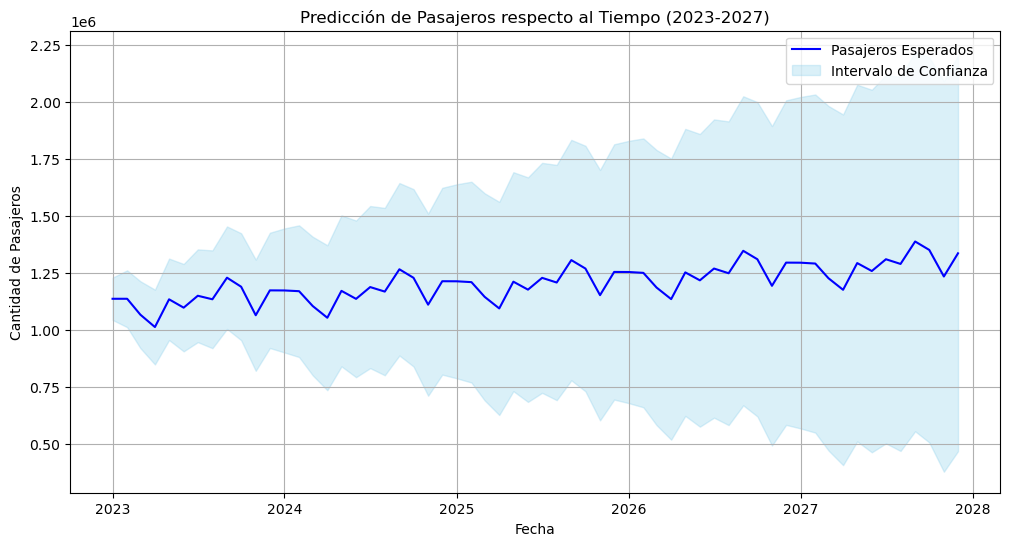

In [ ]:
data = pd.read_csv('predictions_5_years_starting_2023.csv')
# Convert 'Fecha' to datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Fecha'], data['Pasajeros_Esperados'], label='Pasajeros Esperados', color='blue')
plt.fill_between(data['Fecha'], data['Lower_CI'], data['Upper_CI'], color='skyblue', alpha=0.3, label='Intervalo de Confianza')

# Formatting the plot
plt.title('Predicción de Pasajeros respecto al Tiempo (2023-2027)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasajeros')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Show plot
plt.show()



# Creacion del modelo SARIMA para VivaAerobus

In [ ]:
vivaaerobus_subset = airles_subsets['Vivaaerobus']

In [ ]:
#Eliminamos las filas 2006
vivaaerobus_subset = vivaaerobus_subset[vivaaerobus_subset['Año'] != 2006]
vivaaerobus_subset.head()

,Año,Aerolinea,Mes,Pasajeros
2736,2007,Vivaaerobus,1,59961
2737,2007,Vivaaerobus,2,53302
2738,2007,Vivaaerobus,3,86742
2739,2007,Vivaaerobus,4,84777
2740,2007,Vivaaerobus,5,115052


In [ ]:
#Eliminamos la columna de 'Aerolinea'
vivaaerobus_subset = vivaaerobus_subset.drop('Aerolinea', axis=1)

#Juntamos la columna Año y Mes en una sola columna
vivaaerobus_subset['Fecha'] = vivaaerobus_subset['Año'].astype(str) + '-' + vivaaerobus_subset['Mes'].astype(str)

#Eliminamos las columnas de Año y Mes
vivaaerobus_subset = vivaaerobus_subset.drop(['Año', 'Mes'], axis=1)

#Ponemos primero la columna de Fecha
vivaaerobus_subset = vivaaerobus_subset[['Fecha', 'Pasajeros']]
vivaaerobus_subset.head()

#Guardamos el dataframe en un csv
vivaaerobus_subset.to_csv('vivaaerobus_subset.csv', index=False)

In [ ]:
#Guardamos el subset en un csv
vivaaerobus_subset.to_csv('vivaaerobus_subset.csv', index=False)

In [ ]:
vivaaerobus = pd.read_csv('vivaaerobus_subset.csv')

In [ ]:
# Aplicamos la prueba de Dickey-Fuller aumentada (ADF) para comprobar si la serie de tiempo es estacionaria
from statsmodels.tsa.stattools import adfuller

serie_temporal = vivaaerobus['Pasajeros']

# Realizar la Prueba de Dickey-Fuller Aumentada
resultado_adf = adfuller(serie_temporal)

print('Estadístico de Prueba:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Número de Retrasos Utilizados:', resultado_adf[2])
print('Número de Observaciones Utilizadas:', resultado_adf[3])
print('Valores Críticos:')
for key, value in resultado_adf[4].items():
    print(f'    {key}: {value}')
    
# Interpretar el resultado
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

Estadístico de Prueba: 1.1124360532685362
p-valor: 0.995321374111113
Número de Retrasos Utilizados: 13
Número de Observaciones Utilizadas: 178
Valores Críticos:
    1%: -3.467631519151906
    5%: -2.8779183721695567
    10%: -2.575501353364474
La serie no es estacionaria.


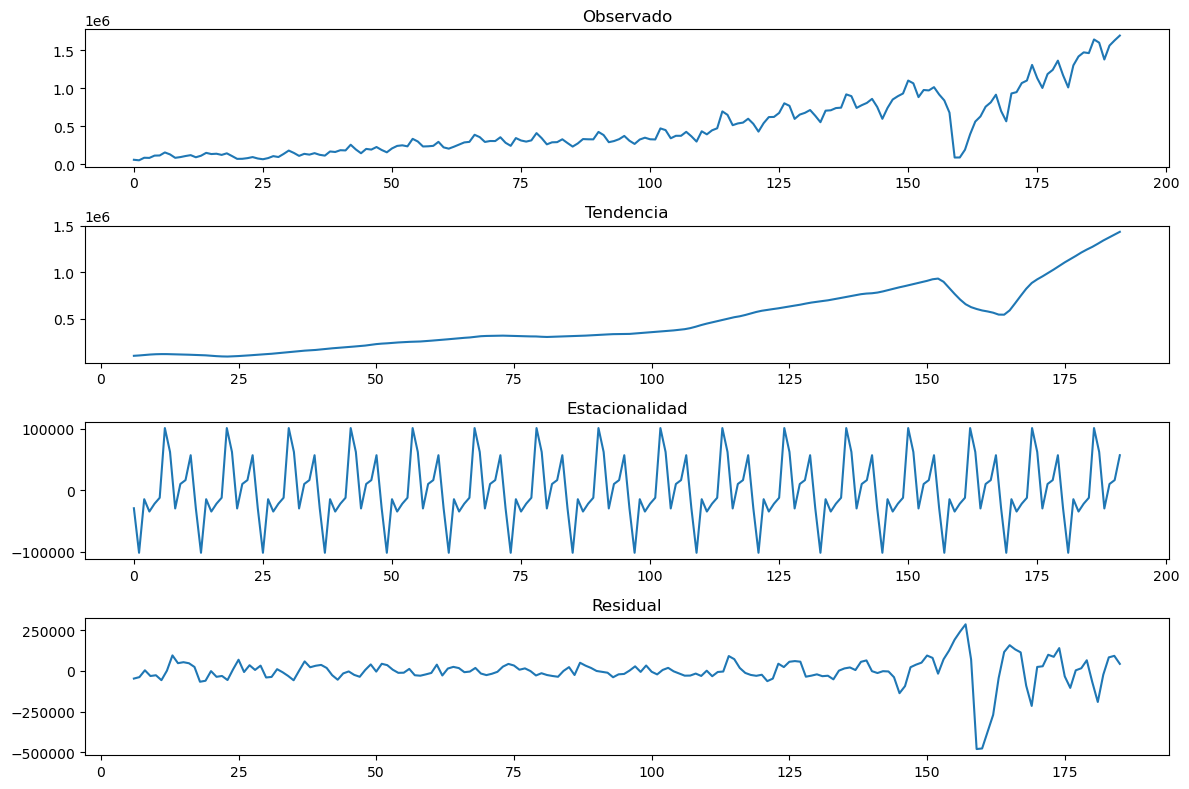

In [ ]:
# Aplicamos el modelo SARIMA

#Realizamos la descomposición estacional de la serie temporal
descomposicion = seasonal_decompose(vivaaerobus['Pasajeros'], model='additive', period=12)

# Graficar los componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
descomposicion.observed.plot(ax=ax1)
ax1.set_title('Observado')
descomposicion.trend.plot(ax=ax2)
ax2.set_title('Tendencia')
descomposicion.seasonal.plot(ax=ax3)
ax3.set_title('Estacionalidad')
descomposicion.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

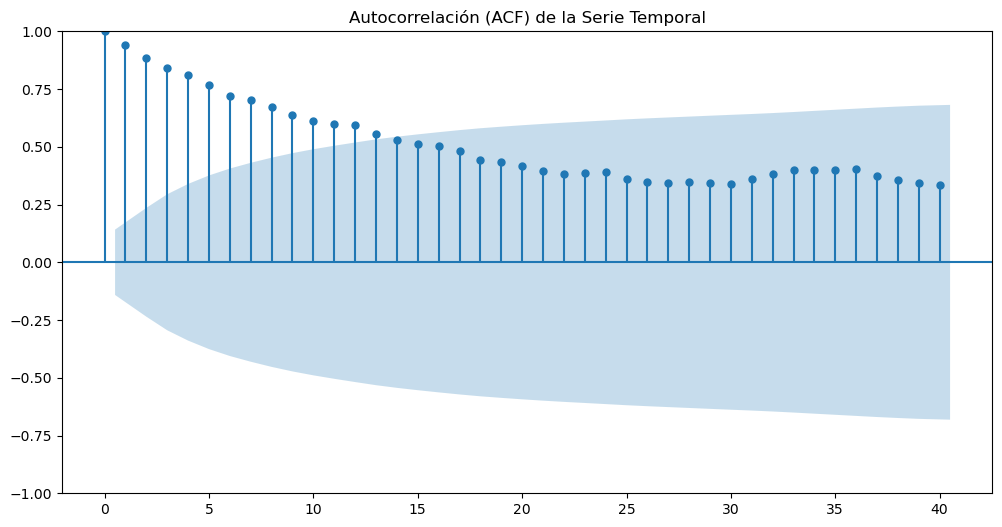

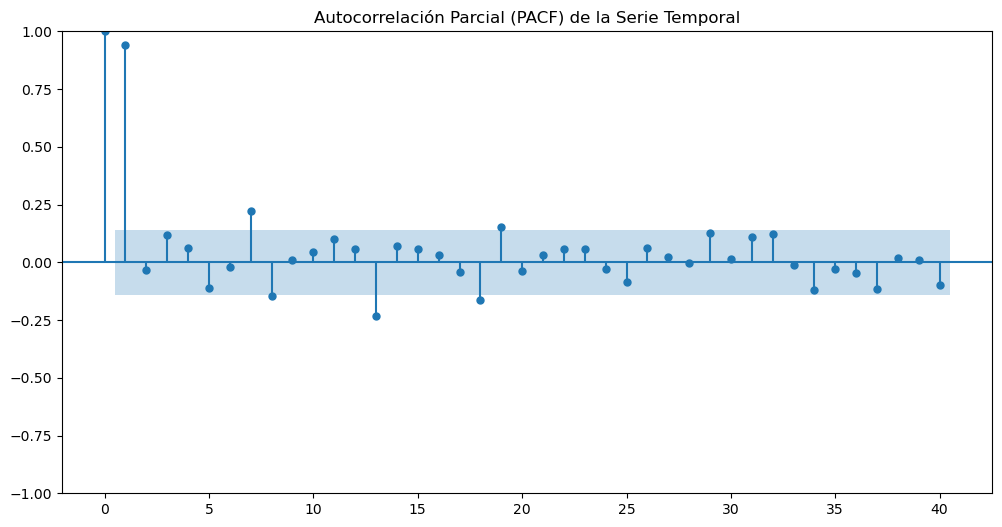

Test Statistic                  -1.196745
p-value                          0.911168
#Lags Used                      13.000000
Number of Observations Used    178.000000
Critical Value (1%)             -4.010551
Critical Value (5%)             -3.435448
Critical Value (10%)            -3.141704
dtype: float64

In [ ]:
# Verificar la estacionalidad con una prueba de Dickey-Fuller estacional
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def seasonal_adfuller_test_Viva(series, maxlag=None, regression='c', autolag='AIC'):
    """
    Realizar una prueba de Dickey-Fuller estacional.
    """
    dftest = adfuller(series, maxlag=maxlag, regression=regression, autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Realizar la prueba de Dickey-Fuller estacional
resultado_df_estacional = seasonal_adfuller_test_Viva(vivaaerobus['Pasajeros'], regression='ct')

# Calcular y graficar la función de autocorrelación (ACF) y autocorrelación parcial (PACF) para la serie temporal
plt.figure(figsize=(12,6))
plot_acf(vivaaerobus['Pasajeros'], lags=40, ax=plt.gca())
plt.title('Autocorrelación (ACF) de la Serie Temporal')
plt.figure(figsize=(12,6))
plot_pacf(vivaaerobus['Pasajeros'], lags=40, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF) de la Serie Temporal')
plt.show()

resultado_df_estacional

In [ ]:
#Ajusatmos el modelo SARIMA con los parámetros seleccionados
sarima_model = SARIMAX(vivaaerobus['Pasajeros'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()

#Mostramos el resumen del modelo
sarima_summary = sarima_result.summary()
sarima_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Pasajeros   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2091.847
Date:                            Sat, 13 Jan 2024   AIC                           4193.693
Time:                                    21:29:35   BIC                           4209.223
Sample:                                         0   HQIC                          4199.997
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1997      0.197     -1.012      0.312      -0.587       0.187
ma.L1          0.5751      0.177      3.253      0.001       0.229       0.922
ar.S.L12      -0.1824      0.091     -1.994      0.046      -0.362      -0.003
ma.S.L12      -0.6130      0.100     -6.112      0.000      -0.810      -0.416
sigma2      8.393e+09   9.04e-12   9.28e+20      0.000    8.39e+09    8.39e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1734.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              13.45   Skew:                            -1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+37. Standard errors may be unstable.
"""

In [ ]:
# Ajustando y probando un modelo SARIMA alternativo con diferentes parámetros
# Usaremos SARIMA(2, 1, 2)x(1, 1, 1, 12) como alternativa

sarima_model_alternativo = SARIMAX(vivaaerobus['Pasajeros'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result_alternativo = sarima_model_alternativo.fit()

# Mostrar el resumen del modelo alternativo
sarima_summary_alternativo = sarima_result_alternativo.summary()
sarima_summary_alternativo


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Pasajeros   No. Observations:                  192
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2077.349
Date:                              Sat, 13 Jan 2024   AIC                           4168.699
Time:                                      21:30:12   BIC                           4190.398
Sample:                                           0   HQIC                          4177.508
                                              - 192                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8250      0.226      3.649      0.000       0.382       1.268
ar.L2          0.0194      0.248      0.078      0.938      -0.468       0.506
ma.L1         -0.4835      0.214     -2.259      0.024      -0.903      -0.064
ma.L2         -0.4638      0.220     -2.109      0.035      -0.895      -0.033
ar.S.L12      -0.1678      0.102     -1.641      0.101      -0.368       0.033
ma.S.L12      -0.5984      0.099     -6.034      0.000      -0.793      -0.404
sigma2      8.324e+09   3.74e-11   2.23e+20      0.000    8.32e+09    8.32e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2088.96
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              13.42   Skew:                            -1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.51e+36. Standard errors may be unstable.
"""

In [ ]:
# Ajustando un modelo SARIMA alternativo eliminando los términos no significativos
# Usaremos SARIMA(1, 1, 1)x(1, 1, 1, 12) como alternativa

sarima_model_ajustado = SARIMAX(vivaaerobus['Pasajeros'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result_ajustado = sarima_model_ajustado.fit()

# Mostrar el resumen del modelo ajustado
sarima_summary_ajustado = sarima_result_ajustado.summary()
sarima_summary_ajustado


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Pasajeros   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2091.847
Date:                            Sat, 13 Jan 2024   AIC                           4193.693
Time:                                    21:48:03   BIC                           4209.223
Sample:                                         0   HQIC                          4199.997
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1997      0.197     -1.012      0.312      -0.587       0.187
ma.L1          0.5751      0.177      3.253      0.001       0.229       0.922
ar.S.L12      -0.1824      0.091     -1.994      0.046      -0.362      -0.003
ma.S.L12      -0.6130      0.100     -6.112      0.000      -0.810      -0.416
sigma2      8.393e+09   9.04e-12   9.28e+20      0.000    8.39e+09    8.39e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1734.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              13.45   Skew:                            -1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+37. Standard errors may be unstable.
"""

C:\Users\diego\AppData\Local\Temp\ipykernel_9636\2324796745.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(223)


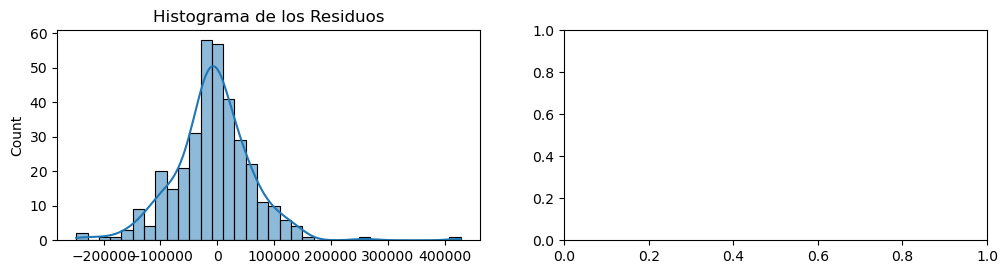

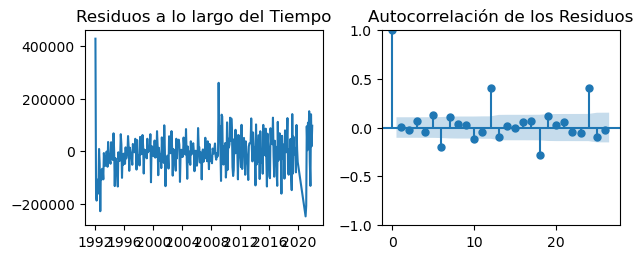

In [ ]:
import statsmodels.api as sm

# Corrigiendo el error y generando nuevamente los gráficos para el análisis de los residuos

# Histograma de los residuos
plt.figure(figsize=(12, 6))
plt.subplot(221)
sns.histplot(residuos, kde=True)
plt.title('Histograma de los Residuos')

# Gráfico Q-Q (Quantile-Quantile) para los residuos
plt.subplot(222)
sm.qqplot(residuos, line='s')
plt.title('Gráfico Q-Q de los Residuos')

# Gráfico de los residuos en el tiempo
plt.subplot(223)
plt.plot(residuos)
plt.title('Residuos a lo largo del Tiempo')

# Autocorrelación de los residuos
plt.subplot(224)
plot_acf(residuos, ax=plt.gca())
plt.title('Autocorrelación de los Residuos')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Configuración de la validación cruzada de series temporales
tscv = TimeSeriesSplit(n_splits=5)

# Variables para almacenar las métricas de rendimiento
rmse_scores = []

# Validación cruzada de series temporales
for train_index, test_index in tscv.split(vivaaerobus['Pasajeros']):
    cv_train, cv_test = vivaaerobus['Pasajeros'].iloc[train_index], vivaaerobus['Pasajeros'].iloc[test_index]
    
    # Ajustar el modelo SARIMA
    model = SARIMAX(cv_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Realizar predicciones
    predictions = model_fit.forecast(len(cv_test))
    
    # Calcular el RMSE y almacenarlo
    rmse_score = np.sqrt(mean_squared_error(cv_test, predictions))
    rmse_scores.append(rmse_score)
    
# Imprimir los resultados de RMSE para cada división
for i, score in enumerate(rmse_scores, 1):
    print(f'Split {i} RMSE: {score}')
    
# Calcular el RMSE medio de todas las divisiones
mean_rmse = np.mean(rmse_scores)
print(f'\nMean RMSE across all splits: {mean_rmse}')


c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Split 1 RMSE: 39782.08252421284
Split 2 RMSE: 28463.25979087089
Split 3 RMSE: 150267.18646535592
Split 4 RMSE: 174715.09508187327
Split 5 RMSE: 2960137.6941103847

Mean RMSE across all splits: 670673.0635945394


c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


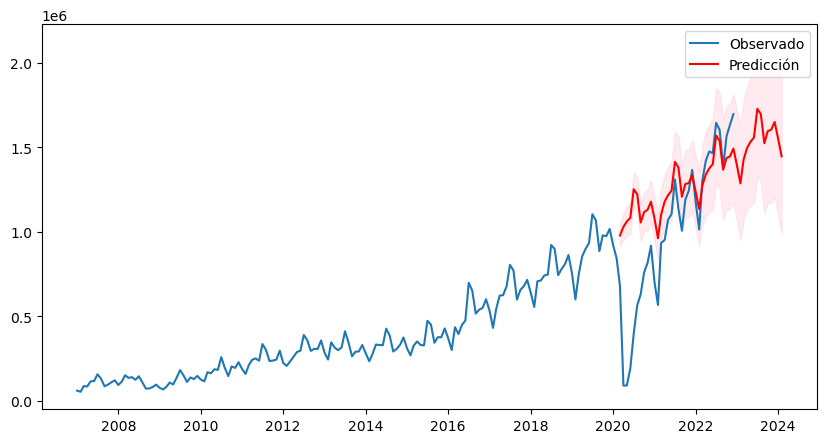

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Cargar los datos
data_vivaaerobus = pd.read_csv('vivaaerobus_subset.csv')
data_vivaaerobus['Fecha'] = pd.to_datetime(data_vivaaerobus['Fecha'])
data_vivaaerobus.set_index('Fecha', inplace=True)

# Identificar el periodo de impacto del COVID-19
start_covid_impact = '2020-03-01'
end_covid_impact = '2021-06-01'

# Crear una variable dummy para el período de COVID-19
data_vivaaerobus['Covid_Impact'] = ((data_vivaaerobus.index >= start_covid_impact) & (data_vivaaerobus.index <= end_covid_impact)).astype(int)

# Excluir el periodo de impacto del COVID-19
data_recuperacion_vivaaerobus = data_vivaaerobus.loc[data_vivaaerobus.index < start_covid_impact]

# Ajustar un modelo SARIMA con una variable exógena para la pandemia
model_vivaaerobus = SARIMAX(data_recuperacion_vivaaerobus['Pasajeros'],
                            exog=data_recuperacion_vivaaerobus[['Covid_Impact']],
                            order=(1, 1, 1),
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)

results_vivaaerobus = model_vivaaerobus.fit()

# Realizar predicciones futuras
steps = 48  # Por ejemplo, 48 meses para 4 años de predicciones futuras
exog_future = data_vivaaerobus[['Covid_Impact']].tail(steps)
predictions_vivaaerobus = results_vivaaerobus.get_forecast(steps=steps, exog=exog_future)

# Obtener el pronóstico predicho y los intervalos de confianza
forecasted_values_vivaaerobus = predictions_vivaaerobus.predicted_mean
conf_int_vivaaerobus = predictions_vivaaerobus.conf_int()

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(data_vivaaerobus['Pasajeros'], label='Observado')
plt.plot(forecasted_values_vivaaerobus.index, forecasted_values_vivaaerobus, label='Predicción', color='red')

# Dibujar los intervalos de confianza
plt.fill_between(conf_int_vivaaerobus.index,
                 conf_int_vivaaerobus.iloc[:, 0],
                 conf_int_vivaaerobus.iloc[:, 1], color='pink', alpha=0.3)

plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el RMSE y MAE
mse = mean_squared_error(data['Pasajeros'][:len(forecasted_values)], forecasted_values)
mae = mean_absolute_error(data['Pasajeros'][:len(forecasted_values)], forecasted_values)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')


Error Cuadrático Medio (MSE): 1476037762127.6416
Error Absoluto Medio (MAE): 1202474.738113886


In [ ]:
# Asumiendo que 'model_fit' es tu modelo SARIMA ajustado
# Guardar el modelo en un archivo
filename = 'sarima_model_vivaaerobus.sav'
joblib.dump(model_fit, filename)

['sarima_model_vivaaerobus.sav']

In [ ]:
import joblib

# Guardar el modelo en disco
filename = 'sarima_model_vivaaerobus.sav'
joblib.dump(model_fit, filename)

# Más tarde, cargar el modelo desde disco
loaded_model = joblib.load(filename)

# Hacer predicciones con el modelo cargado
# Necesitas proporcionar los pasos de tiempo para las predicciones y cualquier variable exógena si es necesario
# Aquí, 'steps' es el número de periodos de tiempo que quieres predecir
steps = 12
predictions = loaded_model.get_forecast(steps=steps)

# Mostrar las predicciones
print(predictions.predicted_mean)


310    1.135493e+06
311    1.135533e+06
312    1.065820e+06
313    1.011420e+06
314    1.133122e+06
315    1.096511e+06
316    1.148764e+06
317    1.133268e+06
318    1.228034e+06
319    1.188397e+06
320    1.063237e+06
321    1.172386e+06
Name: predicted_mean, dtype: float64


In [ ]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('sarima_model_vivaaerobus.sav')

# Predecir para el año 2023 (12 meses)
predictions_2023 = loaded_model.get_forecast(steps=12)

# Obtener el valor predicho y los intervalos de confianza
predicted_values_2023 = predictions_2023.predicted_mean
confidence_intervals_2023 = predictions_2023.conf_int()

# Imprimir los valores predichos y los intervalos de confianza
print(predicted_values_2023)
print(confidence_intervals_2023)

310    1.135493e+06
311    1.135533e+06
312    1.065820e+06
313    1.011420e+06
314    1.133122e+06
315    1.096511e+06
316    1.148764e+06
317    1.133268e+06
318    1.228034e+06
319    1.188397e+06
320    1.063237e+06
321    1.172386e+06
Name: predicted_mean, dtype: float64
     lower Pasajeros  upper Pasajeros
310     1.042777e+06     1.228208e+06
311     1.010872e+06     1.260194e+06
312     9.191294e+05     1.212510e+06
313     8.473642e+05     1.175476e+06
314     9.543666e+05     1.311878e+06
315     9.047556e+05     1.288267e+06
316     9.451783e+05     1.352349e+06
317     9.187104e+05     1.347826e+06
318     1.003163e+06     1.452904e+06
319     9.537430e+05     1.423051e+06
320     8.192391e+05     1.307236e+06
321     9.194175e+05     1.425355e+06


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib



loaded_model = joblib.load('sarima_model_vivaaerobus.sav')

# Establecer el número de pasos para predecir (5 años)
steps = 5 * 12

# Asegurarse de que el índice es de tipo DateTimeIndex
vivaaerobus_data.index = pd.to_datetime(vivaaerobus_data.index)

# Obtener la última fecha de los datos
last_date = vivaaerobus_data.index[-1]

# Si la última fecha de los datos es anterior a 2023, comienza desde enero de 2023.
# De lo contrario, comienza desde la última fecha de los datos.
start_date = pd.Timestamp(year=2023, month=1, day=1) if last_date < pd.Timestamp(year=2023, month=1, day=1) else last_date + pd.offsets.MonthBegin()

# Generar fechas futuras para las predicciones comenzando en 2023
future_dates = pd.date_range(start=start_date, periods=steps, freq='MS')

# Realizar las predicciones
predictions = loaded_model.get_forecast(steps=steps)

# Extraer el valor predicho y el intervalo de confianza
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

# Crear un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame({
    'Fecha': future_dates,
    'Pasajeros_Esperados': predicted_means.values,
    'Lower_CI': conf_int.iloc[:, 0].values,
    'Upper_CI': conf_int.iloc[:, 1].values
})

# Guardar el DataFrame como CSV
predictions_df.to_csv('predictions_5_years_vivaaerobus.csv', index=False)


NameError: name 'vivaaerobus_data' is not defined

In [ ]:
#Crear un subset para mexicana y guardarlo en un csv

mexicana_subset = airles_subsets['Mexicana']
mexicana_subset.head()

NameError: name 'airles_subsets' is not defined

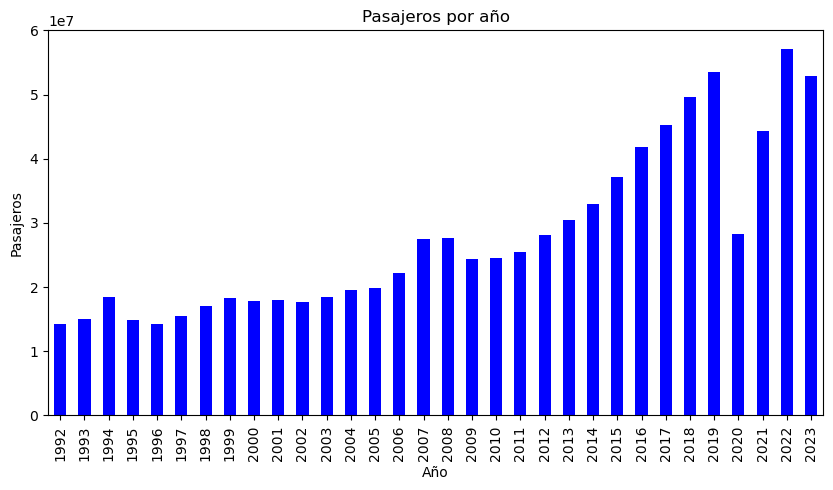

In [ ]:
#Sumar a los pasajeros por año

Historico = pd.read_csv("Historico.csv")

#Graficar por año la suma de pasaros

Historico.groupby('Año').sum()['Total / Total'].plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Pasajeros por año')
plt.ylabel('Pasajeros')
plt.show()
